In [1]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

#import tensorflow as tf
#from keras.utils.np_utils import to_categorical
#from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

Exploratory Data Analysis


In [2]:
image_dir = "/scratch/xxsi3290/Kaggle/jpeg/jpeg/"

In [3]:
dicom_data = pd.read_csv('/scratch/xxsi3290/Kaggle/dicom_info.csv')
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [4]:
dicom_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [5]:
# check image types in dataset
dicom_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [6]:
meta_data = pd.read_csv('/scratch/xxsi3290/Kaggle/meta.csv')
meta_data.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [7]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  6775 non-null   object
 1   StudyInstanceUID   6775 non-null   object
 2   Modality           6775 non-null   object
 3   SeriesDescription  6775 non-null   object
 4   BodyPartExamined   6775 non-null   object
 5   SeriesNumber       6775 non-null   int64 
 6   Collection         6775 non-null   object
 7   Visibility         6775 non-null   int64 
 8   ImageCount         6775 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 476.5+ KB


In [8]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [9]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [10]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [11]:
#cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg/', image_dir, regex=True))
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg/', image_dir, regex=True)
#cropped_images.head()

full_mammogram_images = full_mammogram_images.replace('CBIS-DDSM/jpeg/', image_dir, regex=True)
#full_mammogram_images.head()

ROI_mask_images = ROI_mask_images.replace('CBIS-DDSM/jpeg/', image_dir, regex=True)
#ROI_mask_images.head()

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammogram_images.iloc[0])
print('ROI Mask Images paths:\n')
print(ROI_mask_images.iloc[0])

Cropped Images paths:

/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [12]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammogram_images:
    key = dicom.split("/")[6]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[6]
    cropped_images_dict[key] = dicom
for dicom in ROI_mask_images:
    key = dicom.split("/")[6]
    roi_img_dict[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

Image visualisation - Full mammogram && ROI mask

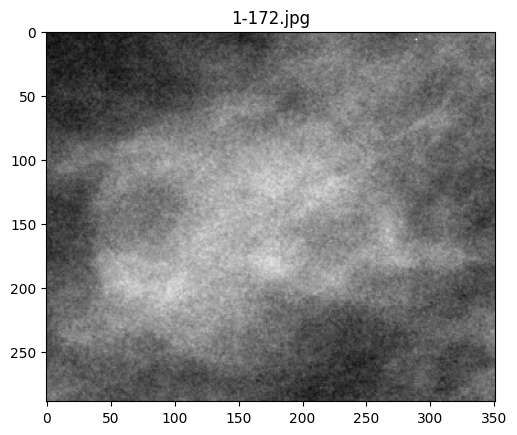

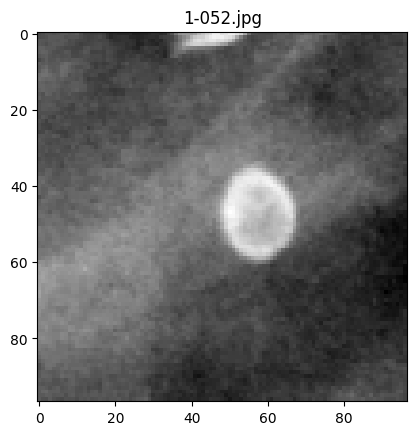

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/1-034.jpg


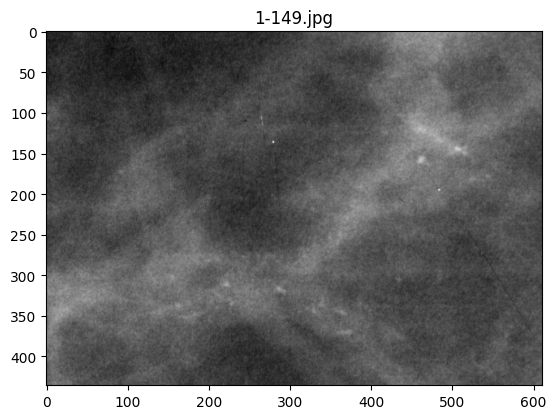

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/1-003.jpg
File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/1-085.jpg


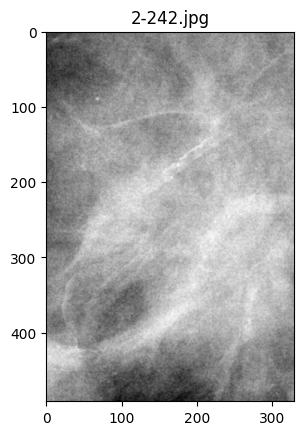

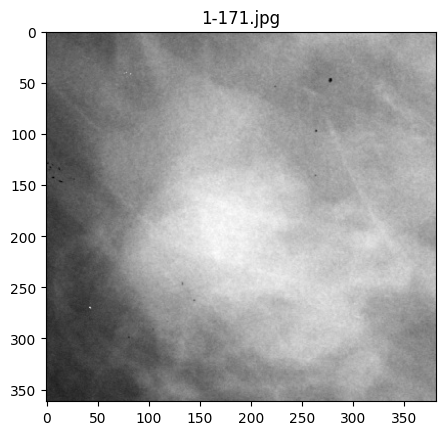

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281604745510897859806968805740602385667/1-111.jpg


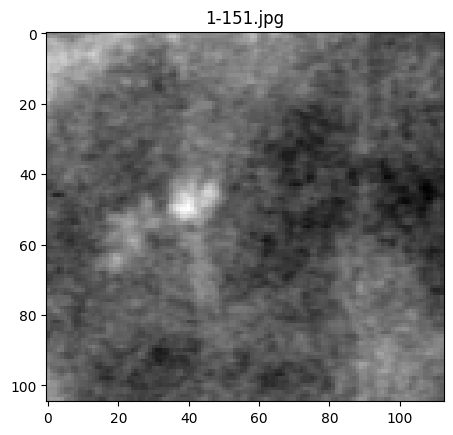

In [13]:
import matplotlib.pyplot as plt 
import glob
import PIL
import random

for file in cropped_images[0:10]:
    try:
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue  # Skip to the next file
        cropped_images_show = PIL.Image.open(file)
        gray_img = cropped_images_show.convert("L")
        plt.imshow(gray_img, cmap='gray')
        plt.title(os.path.basename(file))
        plt.show()
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue

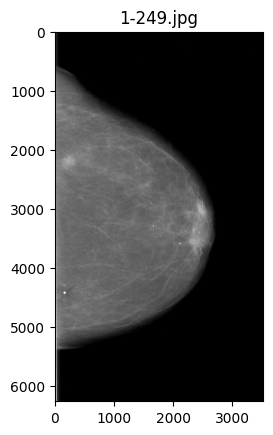

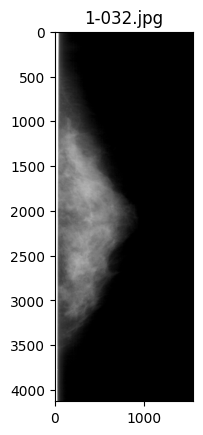

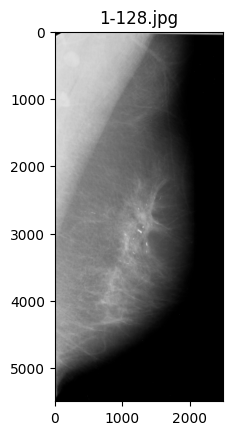

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658311383957201426978750903861062/1-248.jpg


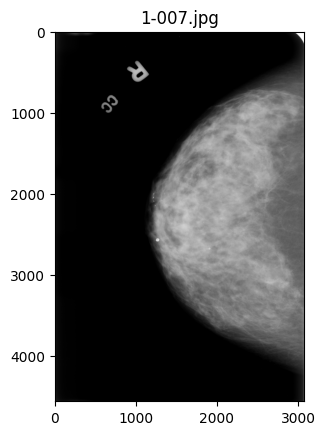

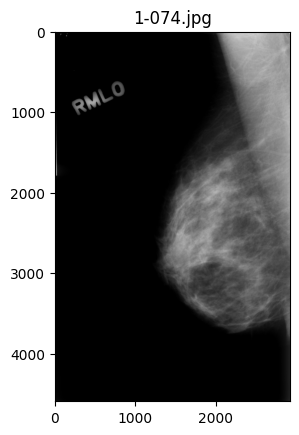

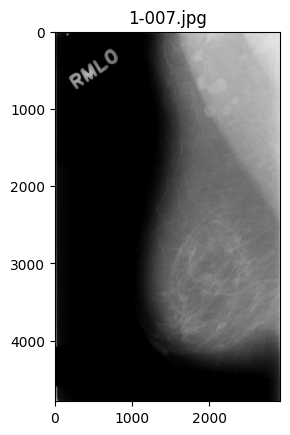

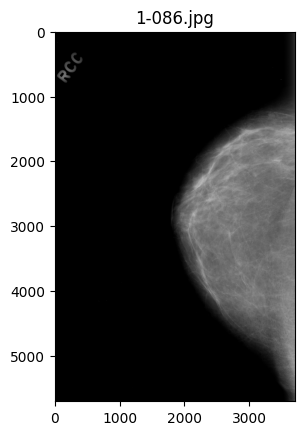

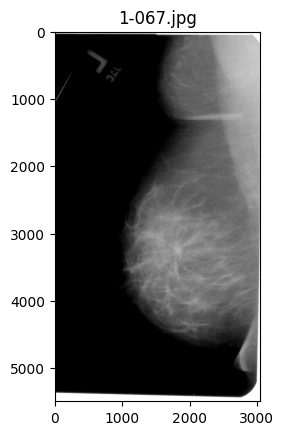

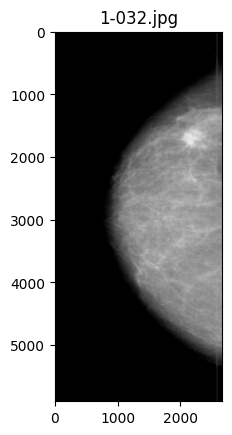

In [14]:
import os
import PIL
import matplotlib.pyplot as plt

for file  in full_mammogram_images[0:10]:
    try:
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue
        full_mammogram_images_show = PIL.Image.open(file)
        gray_img= full_mammogram_images_show.convert("L")
        plt.imshow(gray_img, cmap='gray')
        plt.title(os.path.basename(file))
        plt.show()
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


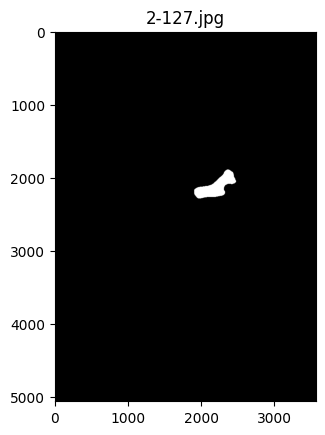

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/2-281.jpg
File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg


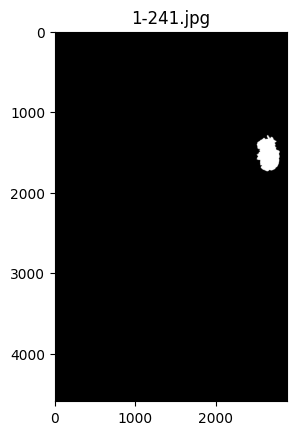

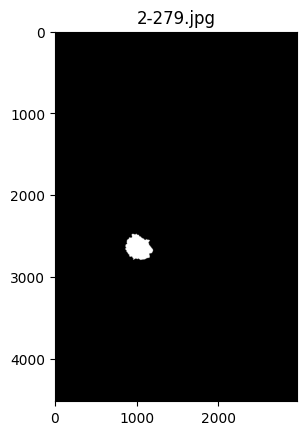

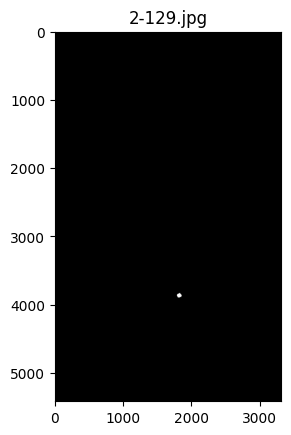

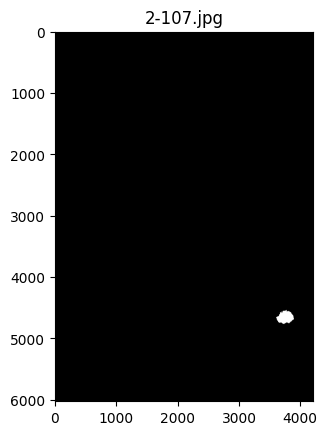

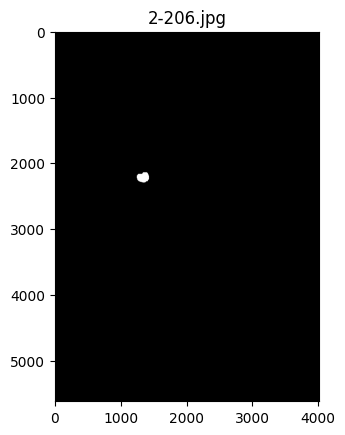

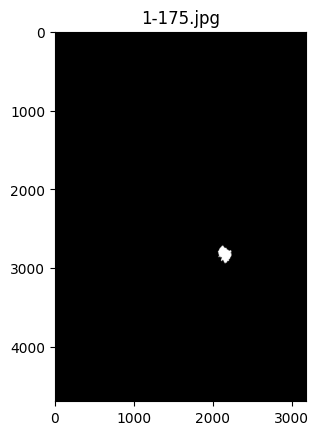

In [15]:
import os
import PIL
import matplotlib.pyplot as plt

for file in ROI_mask_images[0:10]:
    try:
        if not os.path.exists(file):  
            print(f"File not found: {file}")
            continue
        ROI_mask_images_show = PIL.Image.open(file)
        gray_img = ROI_mask_images_show.convert("L")
        plt.imshow(gray_img, cmap='gray')
        plt.title(os.path.basename(file))
        plt.show()
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue


Data Cleaning - Calcification && Mass

In [16]:
calc_train_df = pd.read_csv('/scratch/xxsi3290/Kaggle/calc_case_description_train_set.csv')
calc_test_df = pd.read_csv('/scratch/xxsi3290/Kaggle/calc_case_description_test_set.csv')

calc_train_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [17]:
def fix_image_path_calc(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammo_dict:
            dataset.iloc[i, 11] = full_mammo_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_images_dict:
            dataset.iloc[i, 12] = cropped_images_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_img_dict:
            dataset.iloc[i, 13] = roi_img_dict[img_name]

fix_image_path_calc(calc_train_df)
fix_image_path_calc(calc_test_df)

In [18]:
# check unique values in pathology column
calc_train_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [19]:
mass_train_df = pd.read_csv('/scratch/xxsi3290/Kaggle/mass_case_description_train_set.csv')
mass_test_df = pd.read_csv('/scratch/xxsi3290/Kaggle/mass_case_description_test_set.csv')

mass_train_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [20]:
def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammo_dict:
            dataset.iloc[i, 11] = full_mammo_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_images_dict:
            dataset.iloc[i, 12] = cropped_images_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_img_dict:
            dataset.iloc[i, 13] = roi_img_dict[img_name]

fix_image_path_mass(mass_train_df)
fix_image_path_mass(mass_test_df)

In [21]:
mass_train_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [22]:
mass_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [23]:
# rename columns
mass_train_df = mass_train_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train_df.head(5)

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
1  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
2  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
3  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
4  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   

                             cropped_image_file_path  \
0  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
1  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
2  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
3  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
4  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   

                                  ROI_mask_file_path  
0  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
1  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
2  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
3  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
4  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...

In [24]:
# check for null values
mass_train_df.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [25]:
# fill in missing values using the backwards fill method
mass_train_df['mass_shape'] = mass_train_df['mass_shape'].bfill()
mass_train_df['mass_margins'] = mass_train_df['mass_margins'].bfill()

#check null values
mass_train_df.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [26]:
# quantitative summary of features
mass_train_df.describe()

breast_density  abnormality_id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [27]:
# view mass_test
mass_test_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
1  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
2  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
3  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
4  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   

                             cropped image file path  \
0  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
1  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
2  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
3  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   
4  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...   

                                  ROI mask file path  
0  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
1  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
2  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
3  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...  
4  /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...

In [28]:
# check datasets shape
print(f'Shape of mass_train: {mass_train_df.shape}')
print(f'Shape of mass_test: {mass_test_df.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [29]:
mass_test_df.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [30]:
mass_test_df = mass_test_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [31]:
# fill in missing values using the backwards fill method
mass_test_df['mass_margins'] = mass_test_df['mass_margins'].bfill()

#check null values
mass_test_df.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [32]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# create function to display images
def display_images(column, number):
    valid_rows = []

    # First, collect only valid image paths
    for _, row in mass_train_df.iterrows():
        image_path = row[column]
        if os.path.exists(image_path):
            valid_rows.append(row)
        if len(valid_rows) == number:
            break

    # Create subplots
    cols = len(valid_rows)
    fig, axes = plt.subplots(1, cols, figsize=(5 * cols, 5))

    # If only one image is found, axes is not iterable
    if cols == 1:
        axes = [axes]

    # Loop through and display images
    for i, row in enumerate(valid_rows):
        image_path = row[column]
        try:
            image = mpimg.imread(image_path)
            axes[i].imshow(image, cmap='gray')
            axes[i].set_title(f"{row['pathology']}")
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading {image_path}: {e}")
            continue

    plt.tight_layout()
    plt.show()


Full Mammograms:



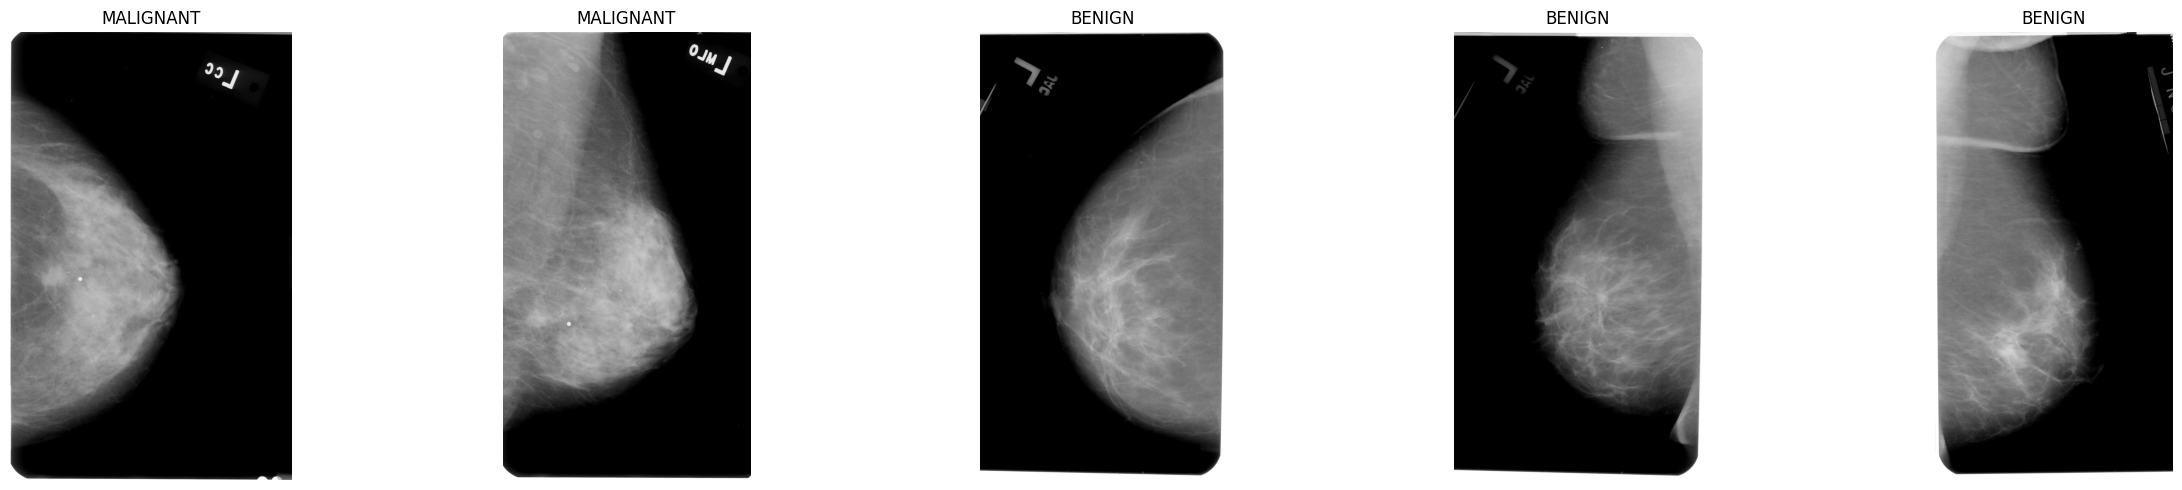

Cropped Mammograms:



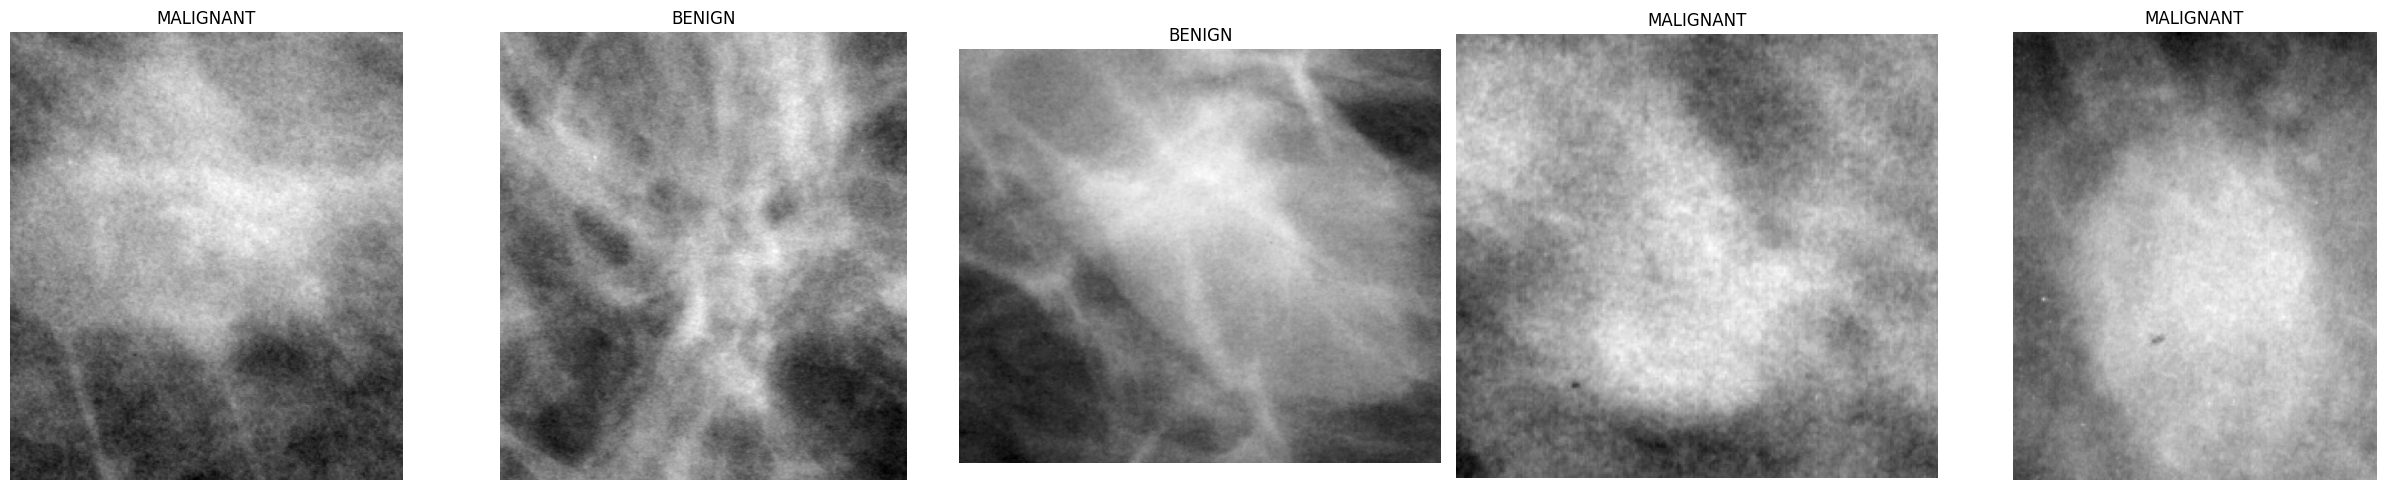

ROI Mask Mammograms:



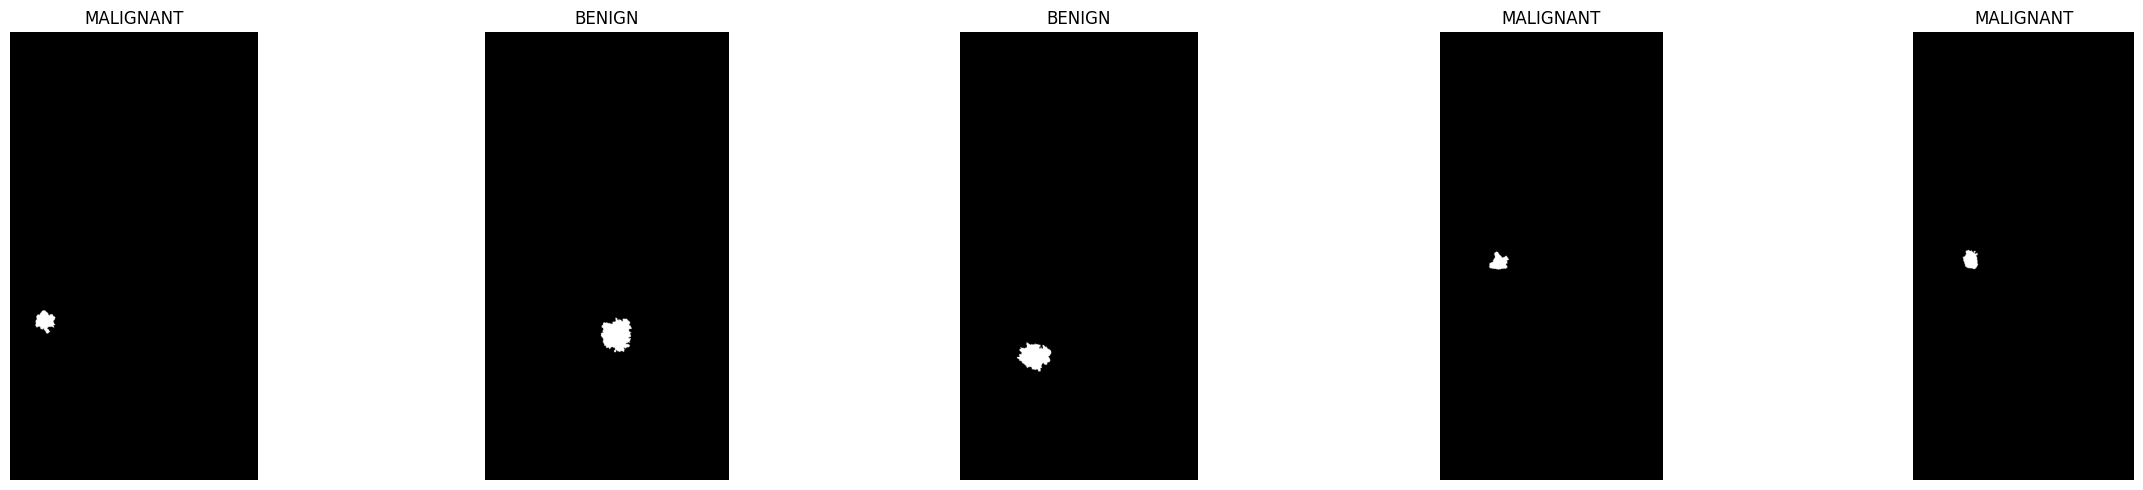

In [33]:
print('Full Mammograms:\n')
display_images('image_file_path', 5)

print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

print('ROI Mask Mammograms:\n')
display_images('ROI_mask_file_path', 5)


In [34]:
from tensorflow.keras.utils import to_categorical
# Import necessary TensorFlow libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Dropout
# from tensorflow.keras.applications.densenet import DenseNet169
import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import warnings

# Suppress all warnings globally
warnings.filterwarnings("ignore")


2025-05-13 17:04:57.580900: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-13 17:04:57.583370: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 17:04:57.639941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 17:04:57.641171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-13 17:05:00.977407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Image preprocessing


In [35]:
#second preprocessing
def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    #image = cv2.imread(absolute_image_path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.imread(absolute_image_path, cv2.IMREAD_GRAYSCALE)

    # Skip unreadable or empty images
    if image is None:
        print(f"Skipping unreadable image: {absolute_image_path}")
        return None
    
    # Resize image
    image = cv2.resize(image, (target_size[1], target_size[0]))
    
    # Histogram Equalization
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    #l_channel, a_channel, b_channel = cv2.split(image)
    #clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    #l_channel = clahe.apply(l_channel)
    #image = cv2.merge((l_channel, a_channel, b_channel))
    #image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)
    
     #Negative transformation
    #image = 255 - image
    
     #Rescale to [0, 1]
    image = image.astype(np.float32) / 255.0
    
    return image

In [36]:
# Merge datasets
full_mass = pd.concat([mass_train_df, mass_test_df], axis=0)

In [37]:
# Define the target size
target_size = (256, 256, 3)
#target_size = (224, 224)

In [38]:
# Sample a subset of images
sample_size = 1696  # Adjust the sample size as needed
full_mass_sample = full_mass.sample(n=sample_size, random_state=42)

In [39]:
# Apply preprocessor to train data
full_mass_sample['processed_images'] = full_mass_sample['image_file_path'].apply(
    lambda x: image_processor(x, target_size)
)
full_mass_sample['mask_images'] = full_mass_sample['ROI_mask_file_path'].apply(
    lambda y: image_processor(y, target_size)
)


[ WARN:0@100.338] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175476572912204146233170994160170991797/1-227.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175476572912204146233170994160170991797/1-227.jpg


[ WARN:0@100.589] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199195778912558713817031507321459770006/1-135.jpg'): can't open/read file: check file path/integrity
[ WARN:0@100.754] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336120486712406273923832111983569913869/1-113.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199195778912558713817031507321459770006/1-135.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336120486712406273923832111983569913869/1-113.jpg


[ WARN:0@101.209] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.180869746613853192241744905213634425726/1-281.jpg'): can't open/read file: check file path/integrity
[ WARN:0@101.378] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.235220303613128401917357295780294851812/1-186.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.180869746613853192241744905213634425726/1-281.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.235220303613128401917357295780294851812/1-186.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258122848711932114229110145764023097059/1-085.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174014585211651496903314748162396558249/1-258.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19175306412221051336720162903880247165/1-065.jpg


[ WARN:0@101.454] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258122848711932114229110145764023097059/1-085.jpg'): can't open/read file: check file path/integrity
[ WARN:0@101.509] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174014585211651496903314748162396558249/1-258.jpg'): can't open/read file: check file path/integrity
[ WARN:0@101.510] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19175306412221051336720162903880247165/1-065.jpg'): can't open/read file: check file path/integrity
[ WARN:0@101.962] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.117454129112394095421646199292904617412/1-105.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.117454129112394095421646199292904617412/1-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16311307713420957612660499721513179515/1-262.jpg


[ WARN:0@102.259] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16311307713420957612660499721513179515/1-262.jpg'): can't open/read file: check file path/integrity
[ WARN:0@102.936] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128110220510263998502063254390605854196/1-054.jpg'): can't open/read file: check file path/integrity
[ WARN:0@102.937] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417738311511512636014376396132371802556/1-038.jpg'): can't open/read file: check file path/integrity
[ WARN:0@103.112] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg'): can't open/read file: check file path/integrity
[ WARN:0@103.115] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128110220510263998502063254390605854196/1-054.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417738311511512636014376396132371802556/1-038.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.171166015912754582622813408142073790722/1-096.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334704328611391643805508991083300190349/1-108.jpg


[ WARN:0@103.229] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.269090020912271881612869996851061481178/1-265.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.269090020912271881612869996851061481178/1-265.jpg


[ WARN:0@103.617] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.397197585712576980835218625502162434719/1-026.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.397197585712576980835218625502162434719/1-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154058962613328519929136864181603772657/1-205.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17179439612364242913491828612897592599/1-075.jpg


[ WARN:0@103.879] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154058962613328519929136864181603772657/1-205.jpg'): can't open/read file: check file path/integrity
[ WARN:0@103.919] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17179439612364242913491828612897592599/1-075.jpg'): can't open/read file: check file path/integrity
[ WARN:0@104.656] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403824995113685855926042098451429311853/1-259.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403824995113685855926042098451429311853/1-259.jpg


[ WARN:0@105.082] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293359047911187270714650133994167840030/1-181.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.083] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263918199211476516622099513693475115311/1-190.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.134] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162585879813814097935228732511788537826/1-119.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.134] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.321571514713247316135159699532641256508/1-215.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.249] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293359047911187270714650133994167840030/1-181.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263918199211476516622099513693475115311/1-190.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162585879813814097935228732511788537826/1-119.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.321571514713247316135159699532641256508/1-215.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83748848211897641311753926793600384304/1-117.jpg


[ WARN:0@105.298] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.388721083313285222217770141913502774487/1-233.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.405] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242629471012127869529548965622673332057/1-258.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.415] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52911228912044066036741669740519618759/1-054.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.388721083313285222217770141913502774487/1-233.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242629471012127869529548965622673332057/1-258.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52911228912044066036741669740519618759/1-054.jpg


[ WARN:0@105.706] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.9383151312430789908711205212663448581/1-243.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.9383151312430789908711205212663448581/1-243.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158760583312396940802790127503023485498/1-099.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.290229220113810647235081932003928413427/1-046.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280437157711493692000884645494047094463/1-130.jpg


[ WARN:0@105.966] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158760583312396940802790127503023485498/1-099.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.967] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.290229220113810647235081932003928413427/1-046.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.979] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280437157711493692000884645494047094463/1-130.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283896293710468565409445671813981066945/1-033.jpg


[ WARN:0@106.233] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283896293710468565409445671813981066945/1-033.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8345832613913482803966749762437997260/1-017.jpg


[ WARN:0@106.436] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8345832613913482803966749762437997260/1-017.jpg'): can't open/read file: check file path/integrity
[ WARN:0@107.530] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232043140012455442340816109393409527243/1-168.jpg'): can't open/read file: check file path/integrity
[ WARN:0@107.566] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69102481911614345738992761764104656383/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@107.700] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57356823611525636036904521060745035167/1-236.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232043140012455442340816109393409527243/1-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69102481911614345738992761764104656383/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57356823611525636036904521060745035167/1-236.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.270615391512904438603136029871346997827/1-180.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304645495911706483111438481251619390979/1-117.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162995550512107573002420048841033718661/1-115.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70876162012018497914376684992676851191/1-181.jpg


[ WARN:0@108.020] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.270615391512904438603136029871346997827/1-180.jpg'): can't open/read file: check file path/integrity
[ WARN:0@108.020] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304645495911706483111438481251619390979/1-117.jpg'): can't open/read file: check file path/integrity
[ WARN:0@108.214] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162995550512107573002420048841033718661/1-115.jpg'): can't open/read file: check file path/integrity
[ WARN:0@108.215] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70876162012018497914376684992676851191/1-181.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74118182511203115438320774433815814204/1-054.jpg


[ WARN:0@108.280] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74118182511203115438320774433815814204/1-054.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149772059212195203914176201483014915047/1-158.jpg


[ WARN:0@108.868] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149772059212195203914176201483014915047/1-158.jpg'): can't open/read file: check file path/integrity
[ WARN:0@109.189] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.234810835612633355538815031322259010855/1-061.jpg'): can't open/read file: check file path/integrity
[ WARN:0@109.191] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.188171322412490158916861741203390183722/1-215.jpg'): can't open/read file: check file path/integrity
[ WARN:0@109.346] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8846141612920489319812758360158257270/1-050.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.234810835612633355538815031322259010855/1-061.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.188171322412490158916861741203390183722/1-215.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8846141612920489319812758360158257270/1-050.jpg


[ WARN:0@109.508] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109231371313746091407897394002747255810/1-090.jpg'): can't open/read file: check file path/integrity
[ WARN:0@109.593] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.145489058813789765335170389942387615556/1-040.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109231371313746091407897394002747255810/1-090.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.145489058813789765335170389942387615556/1-040.jpg


[ WARN:0@109.850] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.78684859813284664039916578740172712994/1-069.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.78684859813284664039916578740172712994/1-069.jpg


[ WARN:0@110.258] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345140832810160378520078721331878282316/1-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@110.344] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417608135813097018923712441772099200133/1-167.jpg'): can't open/read file: check file path/integrity
[ WARN:0@110.389] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.357895865312935232740791412752491722139/1-273.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345140832810160378520078721331878282316/1-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417608135813097018923712441772099200133/1-167.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.357895865312935232740791412752491722139/1-273.jpg


[ WARN:0@110.743] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69745952012889155812092274262822416242/1-097.jpg'): can't open/read file: check file path/integrity
[ WARN:0@110.870] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.303187804912710561742283155760426369730/1-239.jpg'): can't open/read file: check file path/integrity
[ WARN:0@110.870] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.245550762511135550738178630953626561752/1-283.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69745952012889155812092274262822416242/1-097.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.303187804912710561742283155760426369730/1-239.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.245550762511135550738178630953626561752/1-283.jpg


[ WARN:0@111.018] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113107599413757334715056198522480123157/1-223.jpg'): can't open/read file: check file path/integrity
[ WARN:0@111.195] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172386840512013560230074211023706864061/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@111.196] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158164935212165043120376357330832910201/1-177.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113107599413757334715056198522480123157/1-223.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172386840512013560230074211023706864061/1-077.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158164935212165043120376357330832910201/1-177.jpg


[ WARN:0@111.353] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.371739864613089761719883355291307551226/1-046.jpg'): can't open/read file: check file path/integrity
[ WARN:0@111.438] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246326421513862106416389991742169179906/1-107.jpg'): can't open/read file: check file path/integrity
[ WARN:0@111.438] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.30946803412446097718909326270548961243/1-153.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.371739864613089761719883355291307551226/1-046.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246326421513862106416389991742169179906/1-107.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.30946803412446097718909326270548961243/1-153.jpg


[ WARN:0@111.559] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67409892012207587532711656111341914913/1-113.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67409892012207587532711656111341914913/1-113.jpg


[ WARN:0@112.108] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12669257310082858042663169390086466638/1-014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@112.237] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216808559312941034119240923160831351862/1-272.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12669257310082858042663169390086466638/1-014.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216808559312941034119240923160831351862/1-272.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201240665512195560313953074353682854284/1-122.jpg


[ WARN:0@112.582] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201240665512195560313953074353682854284/1-122.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419780045811507010327582708564022857860/1-299.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.288980828511203708511066530843699446563/1-225.jpg


[ WARN:0@113.522] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419780045811507010327582708564022857860/1-299.jpg'): can't open/read file: check file path/integrity
[ WARN:0@113.523] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.288980828511203708511066530843699446563/1-225.jpg'): can't open/read file: check file path/integrity
[ WARN:0@115.373] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44065475811569696824006401280610368950/1-228.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44065475811569696824006401280610368950/1-228.jpg


[ WARN:0@115.946] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151746203711583824325790496232356555781/1-133.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151746203711583824325790496232356555781/1-133.jpg


[ WARN:0@116.497] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325293736011893421816901315930122472763/1-183.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325293736011893421816901315930122472763/1-183.jpg


[ WARN:0@117.107] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54848434312309044100463325442088001375/1-148.jpg'): can't open/read file: check file path/integrity
[ WARN:0@117.156] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33507760912554145902744111920344485171/1-235.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54848434312309044100463325442088001375/1-148.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33507760912554145902744111920344485171/1-235.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.191684932212508771025952925500117559600/1-118.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.200394253511150032912987268422492919749/1-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149183380211624614428278537532778083640/1-178.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370020768811676220424047464123530592133/1-204.jpg


[ WARN:0@117.321] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.191684932212508771025952925500117559600/1-118.jpg'): can't open/read file: check file path/integrity
[ WARN:0@117.393] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.200394253511150032912987268422492919749/1-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@117.504] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149183380211624614428278537532778083640/1-178.jpg'): can't open/read file: check file path/integrity
[ WARN:0@117.504] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370020768811676220424047464123530592133/1-204.jpg'): can't open/read file: check file path/integrity
[ WARN:0@117.542] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416023076012080833905740875610727249164/1-196.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.395806490413060973910077403213561423281/1-097.jpg


[ WARN:0@117.867] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg'): can't open/read file: check file path/integrity
[ WARN:0@118.059] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.395806490413060973910077403213561423281/1-097.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.208612233610863139028646317134220626037/1-021.jpg


[ WARN:0@118.314] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg'): can't open/read file: check file path/integrity
[ WARN:0@118.503] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.208612233610863139028646317134220626037/1-021.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg


[ WARN:0@118.596] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.125012772811929054738373917960770689523/1-273.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141690078312425196829711709851898133059/1-195.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.311879772413692509211401737020929176955/1-177.jpg


[ WARN:0@119.175] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.125012772811929054738373917960770689523/1-273.jpg'): can't open/read file: check file path/integrity
[ WARN:0@119.337] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141690078312425196829711709851898133059/1-195.jpg'): can't open/read file: check file path/integrity
[ WARN:0@119.338] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.311879772413692509211401737020929176955/1-177.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.227359829311782247437660996313591134165/1-265.jpg


[ WARN:0@119.481] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@119.532] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.227359829311782247437660996313591134165/1-265.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241213639112627717226706279733585932152/1-003.jpg


[ WARN:0@120.206] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241213639112627717226706279733585932152/1-003.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.272184723711385047630954095450427972031/1-184.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83882081811707961806397341681542038535/1-198.jpg


[ WARN:0@120.646] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg'): can't open/read file: check file path/integrity
[ WARN:0@120.647] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.272184723711385047630954095450427972031/1-184.jpg'): can't open/read file: check file path/integrity
[ WARN:0@120.774] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83882081811707961806397341681542038535/1-198.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223355501110410477409262071651794035858/1-060.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.120465669611268291509420478952677521038/1-173.jpg


[ WARN:0@121.065] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223355501110410477409262071651794035858/1-060.jpg'): can't open/read file: check file path/integrity
[ WARN:0@121.230] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.120465669611268291509420478952677521038/1-173.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85686461910787171020983218554121150052/1-291.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg


[ WARN:0@121.824] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85686461910787171020983218554121150052/1-291.jpg'): can't open/read file: check file path/integrity
[ WARN:0@121.824] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.265953197912973660327069359641506533925/1-288.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100632214012866120117337678502539182046/1-075.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg


[ WARN:0@122.058] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.265953197912973660327069359641506533925/1-288.jpg'): can't open/read file: check file path/integrity
[ WARN:0@122.059] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100632214012866120117337678502539182046/1-075.jpg'): can't open/read file: check file path/integrity
[ WARN:0@122.185] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55307148413799814332579214442886195340/1-298.jpg


[ WARN:0@122.632] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55307148413799814332579214442886195340/1-298.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219607249012903142628057639991148226306/1-072.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.36825032713107530300938213160028717974/1-270.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg


[ WARN:0@122.997] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219607249012903142628057639991148226306/1-072.jpg'): can't open/read file: check file path/integrity
[ WARN:0@122.998] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.36825032713107530300938213160028717974/1-270.jpg'): can't open/read file: check file path/integrity
[ WARN:0@123.174] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@123.566] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138854373111438727811729486684128233341/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@123.567] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138854373111438727811729486684128233341/1-172.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.1147559510416701110684356293737205301/1-079.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59887648512379053809277845872128232362/1-106.jpg


[ WARN:0@124.092] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194084118912652164632677195583265936023/1-190.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.176964796612485740037787572680731561117/1-077.jpg


[ WARN:0@124.417] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194084118912652164632677195583265936023/1-190.jpg'): can't open/read file: check file path/integrity
[ WARN:0@124.504] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.176964796612485740037787572680731561117/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@124.777] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349504173712862535704286567751526799904/1-020.jpg'): can't open/read file: check file path/integrity
[ WARN:0@124.854] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647/1-111.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349504173712862535704286567751526799904/1-020.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647/1-111.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172787227312499793236059621232382095130/1-267.jpg


[ WARN:0@125.989] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172787227312499793236059621232382095130/1-267.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.313320260312335825215652094932408846389/1-089.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg


[ WARN:0@126.669] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.313320260312335825215652094932408846389/1-089.jpg'): can't open/read file: check file path/integrity
[ WARN:0@126.711] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg'): can't open/read file: check file path/integrity
[ WARN:0@126.907] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.62593965512657640623373713153873390284/1-129.jpg'): can't open/read file: check file path/integrity
[ WARN:0@126.970] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28994390011193705314585586210966915731/1-163.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.62593965512657640623373713153873390284/1-129.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28994390011193705314585586210966915731/1-163.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317213562911173877740615561593769151663/1-037.jpg


[ WARN:0@127.211] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317213562911173877740615561593769151663/1-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361510015512526913136413449054168104152/1-230.jpg


[ WARN:0@127.567] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361510015512526913136413449054168104152/1-230.jpg'): can't open/read file: check file path/integrity
[ WARN:0@127.945] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56526196612878022942647118353975254976/1-017.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56526196612878022942647118353975254976/1-017.jpg


[ WARN:0@128.368] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382912580213452264934816946051837938528/1-036.jpg'): can't open/read file: check file path/integrity
[ WARN:0@128.459] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46228080811339703822182406561482041808/1-085.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382912580213452264934816946051837938528/1-036.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46228080811339703822182406561482041808/1-085.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27953444711693870518443009471767038842/1-179.jpg


[ WARN:0@129.296] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27953444711693870518443009471767038842/1-179.jpg'): can't open/read file: check file path/integrity
[ WARN:0@129.558] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.364070243511921550101340386794199125508/1-107.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.364070243511921550101340386794199125508/1-107.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.273104176312975794115853377520445198068/1-149.jpg


[ WARN:0@130.200] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg'): can't open/read file: check file path/integrity
[ WARN:0@130.201] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.273104176312975794115853377520445198068/1-149.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403835121912715843000196868400248684588/1-104.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg


[ WARN:0@130.461] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403835121912715843000196868400248684588/1-104.jpg'): can't open/read file: check file path/integrity
[ WARN:0@130.461] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@130.607] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139051271411881139019982240242711370769/1-061.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.4258120910410897428422437754132883711/1-109.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281986553811315949820316643132362105669/1-198.jpg


[ WARN:0@130.665] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139051271411881139019982240242711370769/1-061.jpg'): can't open/read file: check file path/integrity
[ WARN:0@130.731] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.4258120910410897428422437754132883711/1-109.jpg'): can't open/read file: check file path/integrity
[ WARN:0@130.812] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281986553811315949820316643132362105669/1-198.jpg'): can't open/read file: check file path/integrity
[ WARN:0@131.508] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385754322612458255422314848630057330699/1-274.jpg'): can't open/read file: check file path/integrity
[ WARN:0@131.510] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385754322612458255422314848630057330699/1-274.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.374524690313732405614119264610057663073/1-035.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.412557731711484790541710247932923951861/1-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.282187186212471477920122594912799518222/1-128.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg


[ WARN:0@132.311] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.412557731711484790541710247932923951861/1-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@132.409] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.282187186212471477920122594912799518222/1-128.jpg'): can't open/read file: check file path/integrity
[ WARN:0@132.471] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@132.930] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241488192410870375308842249503092939065/1-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@133.053] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241488192410870375308842249503092939065/1-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.354974451012606666730836312563315842748/1-072.jpg


[ WARN:0@133.525] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119329332411807101909567041850958066649/1-242.jpg'): can't open/read file: check file path/integrity
[ WARN:0@133.527] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280715336413264839123954197972783877415/1-209.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119329332411807101909567041850958066649/1-242.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280715336413264839123954197972783877415/1-209.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351386294512687684821629395204182081789/1-138.jpg


[ WARN:0@134.690] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351386294512687684821629395204182081789/1-138.jpg'): can't open/read file: check file path/integrity
[ WARN:0@135.232] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424375028213529712235170387420953707530/1-257.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424375028213529712235170387420953707530/1-257.jpg


[ WARN:0@135.550] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351095773812262405525829356842200610924/1-251.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351095773812262405525829356842200610924/1-251.jpg


[ WARN:0@136.466] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10317846812362504718225532432231442871/1-233.jpg'): can't open/read file: check file path/integrity
[ WARN:0@136.551] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.92873692112697289717564934862862198857/1-279.jpg'): can't open/read file: check file path/integrity
[ WARN:0@136.635] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10317846812362504718225532432231442871/1-233.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.92873692112697289717564934862862198857/1-279.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg


[ WARN:0@136.812] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69688454812257584638918432052709217066/1-003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@136.820] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17873451612287715806233693563532897726/1-111.jpg'): can't open/read file: check file path/integrity
[ WARN:0@136.954] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88567571811865245834350703782525414557/1-188.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69688454812257584638918432052709217066/1-003.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17873451612287715806233693563532897726/1-111.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88567571811865245834350703782525414557/1-188.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.136087942912627055207233775400589898698/1-106.jpg


[ WARN:0@137.145] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.136087942912627055207233775400589898698/1-106.jpg'): can't open/read file: check file path/integrity
[ WARN:0@137.352] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.212873695611515204908544382810356004572/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@137.549] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.26328160312807915105944979513644204307/1-042.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.212873695611515204908544382810356004572/1-077.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.26328160312807915105944979513644204307/1-042.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413759996612745390518110068652608488468/1-258.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46561815111905129726185322260150997233/1-070.jpg


[ WARN:0@137.641] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413759996612745390518110068652608488468/1-258.jpg'): can't open/read file: check file path/integrity
[ WARN:0@137.740] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46561815111905129726185322260150997233/1-070.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298507260212876852534436916713961683073/1-072.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33525463311604309520509720512605682139/1-244.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90049668411003307234280101243836805116/1-156.jpg


[ WARN:0@138.247] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298507260212876852534436916713961683073/1-072.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.351] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33525463311604309520509720512605682139/1-244.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.352] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90049668411003307234280101243836805116/1-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.772] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181882185012532469840938456443196306608/1-100.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.859] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181882185012532469840938456443196306608/1-100.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.399831242111800621220027542190666363688/1-046.jpg


[ WARN:0@139.034] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@139.136] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.399831242111800621220027542190666363688/1-046.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225312674712404832441253979110135741852/1-200.jpg


[ WARN:0@139.294] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225312674712404832441253979110135741852/1-200.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283057547411492757733739237421644364669/1-262.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129176419311733274935464126784195349376/1-029.jpg


[ WARN:0@139.509] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283057547411492757733739237421644364669/1-262.jpg'): can't open/read file: check file path/integrity
[ WARN:0@139.637] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129176419311733274935464126784195349376/1-029.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52961829611670829303289191680479351305/1-245.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261521794613721978940690958173191292096/1-290.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.51941006212124694604546402963586764653/1-012.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144135582511225260304642832923710501704/1-125.jpg


[ WARN:0@140.052] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52961829611670829303289191680479351305/1-245.jpg'): can't open/read file: check file path/integrity
[ WARN:0@140.081] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261521794613721978940690958173191292096/1-290.jpg'): can't open/read file: check file path/integrity
[ WARN:0@140.082] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.51941006212124694604546402963586764653/1-012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@140.177] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144135582511225260304642832923710501704/1-125.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.211640311212194984322998849642182089069/1-112.jpg


[ WARN:0@140.325] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.211640311212194984322998849642182089069/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@140.550] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88886372611812195428352690450990697351/1-008.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88886372611812195428352690450990697351/1-008.jpg


[ WARN:0@140.881] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361011800613187938628920052961866947309/1-242.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361011800613187938628920052961866947309/1-242.jpg


[ WARN:0@142.461] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368677889211938858542071548600720272101/1-296.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368677889211938858542071548600720272101/1-296.jpg


[ WARN:0@142.774] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366557165612782681202292343440774546974/1-225.jpg'): can't open/read file: check file path/integrity
[ WARN:0@142.968] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.277904999011825388509729900852338577655/1-135.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366557165612782681202292343440774546974/1-225.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.277904999011825388509729900852338577655/1-135.jpg


[ WARN:0@143.021] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47853905212613770720342330132409520084/1-111.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47853905212613770720342330132409520084/1-111.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160090908610489507721266482061808282031/1-138.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57854390411125252714525874340062956276/1-102.jpg


[ WARN:0@143.225] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160090908610489507721266482061808282031/1-138.jpg'): can't open/read file: check file path/integrity
[ WARN:0@143.335] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57854390411125252714525874340062956276/1-102.jpg'): can't open/read file: check file path/integrity
[ WARN:0@144.755] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44354553611120086116092433180902992105/1-142.jpg'): can't open/read file: check file path/integrity
[ WARN:0@144.944] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258560655311028193625111499672480670508/1-006.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44354553611120086116092433180902992105/1-142.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258560655311028193625111499672480670508/1-006.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19233593713150936611511674154223618351/1-027.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317216124410630220004117216344047489299/1-182.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.135126056112780974433437774491962300014/1-037.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425182509912779827704955040293854758529/1-022.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404577305912728645825627508702429716956/1-194.jpg


[ WARN:0@145.764] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19233593713150936611511674154223618351/1-027.jpg'): can't open/read file: check file path/integrity
[ WARN:0@145.901] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317216124410630220004117216344047489299/1-182.jpg'): can't open/read file: check file path/integrity
[ WARN:0@145.903] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.135126056112780974433437774491962300014/1-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@145.956] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425182509912779827704955040293854758529/1-022.jpg'): can't open/read file: check file path/integrity
[ WARN:0@145.958] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.226496395312887740508078232422990396199/1-009.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317382923213614689928747109691347347957/1-199.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.136495231711077347326245851332072991979/1-142.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.200948278212842430531410154721256979027/1-169.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423418338111627617941958352860375625032/1-093.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg


[ WARN:0@147.005] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg'): can't open/read file: check file path/integrity
[ WARN:0@147.292] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94855395812079770126816595643794643222/1-041.jpg'): can't open/read file: check file path/integrity
[ WARN:0@147.380] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.238090837412902571926841401701921392882/1-247.jpg'): can't open/read file: check file path/integrity
[ WARN:0@147.451] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144954714312199212434707587871456397264/1-127.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94855395812079770126816595643794643222/1-041.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.238090837412902571926841401701921392882/1-247.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144954714312199212434707587871456397264/1-127.jpg


[ WARN:0@147.655] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124069151812440873834583830380563934034/1-123.jpg'): can't open/read file: check file path/integrity
[ WARN:0@147.778] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260358200912160591136730728193628472216/1-238.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124069151812440873834583830380563934034/1-123.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260358200912160591136730728193628472216/1-238.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19265558812219808138485666643988286593/1-238.jpg


[ WARN:0@147.956] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19265558812219808138485666643988286593/1-238.jpg'): can't open/read file: check file path/integrity
[ WARN:0@148.293] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74088365112551230507136001593462769806/1-147.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74088365112551230507136001593462769806/1-147.jpg


[ WARN:0@148.568] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46282940310410044707024149930022040952/1-142.jpg'): can't open/read file: check file path/integrity
[ WARN:0@148.675] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403249842912482807608031953090899102748/1-081.jpg'): can't open/read file: check file path/integrity
[ WARN:0@148.675] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194014761511237421025886729180261985635/1-290.jpg'): can't open/read file: check file path/integrity
[ WARN:0@148.733] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65397885011427959107666095712572175020/1-297.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46282940310410044707024149930022040952/1-142.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403249842912482807608031953090899102748/1-081.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194014761511237421025886729180261985635/1-290.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65397885011427959107666095712572175020/1-297.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.268167584712827481520301103922935194568/1-155.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304847144212231865016298922630149685326/1-078.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg


[ WARN:0@149.177] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.268167584712827481520301103922935194568/1-155.jpg'): can't open/read file: check file path/integrity
[ WARN:0@149.177] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304847144212231865016298922630149685326/1-078.jpg'): can't open/read file: check file path/integrity
[ WARN:0@149.233] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27655563411193153813026594573787372096/1-062.jpg


[ WARN:0@149.444] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27655563411193153813026594573787372096/1-062.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42743836211077677906084043904182953420/1-276.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228112769110310508212894048352876218391/1-288.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299665718312676631426589111303357883600/1-037.jpg


[ WARN:0@149.716] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42743836211077677906084043904182953420/1-276.jpg'): can't open/read file: check file path/integrity
[ WARN:0@149.804] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228112769110310508212894048352876218391/1-288.jpg'): can't open/read file: check file path/integrity
[ WARN:0@149.849] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299665718312676631426589111303357883600/1-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@150.029] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25032151411293752139034702442380199664/1-202.jpg'): can't open/read file: check file path/integrity
[ WARN:0@150.087] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25032151411293752139034702442380199664/1-202.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.265454151711796157924978185193155462733/1-241.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.50489409611504312524210891883569393093/1-129.jpg


[ WARN:0@150.520] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.50489409611504312524210891883569393093/1-129.jpg'): can't open/read file: check file path/integrity
[ WARN:0@151.347] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.256330807412877366440153727190246662818/1-055.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.256330807412877366440153727190246662818/1-055.jpg


[ WARN:0@151.797] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392008643813084177039922070163021225657/1-079.jpg'): can't open/read file: check file path/integrity
[ WARN:0@151.962] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398065969612214189500602623110797804795/1-154.jpg'): can't open/read file: check file path/integrity
[ WARN:0@151.963] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148157969912384261328015497391094806291/1-083.jpg'): can't open/read file: check file path/integrity
[ WARN:0@151.963] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.152233603112126251623360168063905498710/1-282.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392008643813084177039922070163021225657/1-079.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398065969612214189500602623110797804795/1-154.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148157969912384261328015497391094806291/1-083.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.152233603112126251623360168063905498710/1-282.jpg


[ WARN:0@151.999] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362096355311749880109413095802268936069/1-263.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362096355311749880109413095802268936069/1-263.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247139233113856247217565715372804656493/1-231.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27980645513718577626150235351487309400/1-147.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359948563313211921203994090300862857070/1-196.jpg


[ WARN:0@152.231] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247139233113856247217565715372804656493/1-231.jpg'): can't open/read file: check file path/integrity
[ WARN:0@152.327] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27980645513718577626150235351487309400/1-147.jpg'): can't open/read file: check file path/integrity
[ WARN:0@152.411] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359948563313211921203994090300862857070/1-196.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308645904112578662514088364913247733416/1-152.jpg


[ WARN:0@152.734] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308645904112578662514088364913247733416/1-152.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151178406511629586605682927950166107710/1-203.jpg


[ WARN:0@153.560] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151178406511629586605682927950166107710/1-203.jpg'): can't open/read file: check file path/integrity
[ WARN:0@154.361] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149608967312503353909450618211677669934/1-256.jpg'): can't open/read file: check file path/integrity
[ WARN:0@154.523] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76958903112621704936459227274115747517/1-117.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149608967312503353909450618211677669934/1-256.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76958903112621704936459227274115747517/1-117.jpg


[ WARN:0@154.951] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65603312513435703008593993544017526418/1-228.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65603312513435703008593993544017526418/1-228.jpg


[ WARN:0@155.252] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.116404757511169555513192121640222765024/1-084.jpg'): can't open/read file: check file path/integrity
[ WARN:0@155.307] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189618700912186602728870178774202689346/1-025.jpg'): can't open/read file: check file path/integrity
[ WARN:0@155.308] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@155.418] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.262900378610637773719221008832166959346/1-120.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.116404757511169555513192121640222765024/1-084.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189618700912186602728870178774202689346/1-025.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.262900378610637773719221008832166959346/1-120.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104175843212955332137248400671186776872/1-262.jpg


[ WARN:0@155.948] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104175843212955332137248400671186776872/1-262.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345891015013816713918233478951770382675/1-140.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260826680211463150629506377090181207701/1-120.jpg


[ WARN:0@156.406] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345891015013816713918233478951770382675/1-140.jpg'): can't open/read file: check file path/integrity
[ WARN:0@156.527] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260826680211463150629506377090181207701/1-120.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421506712613822555700638363361805204735/1-039.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91499954013996703516414818583573199018/1-264.jpg


[ WARN:0@156.780] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421506712613822555700638363361805204735/1-039.jpg'): can't open/read file: check file path/integrity
[ WARN:0@156.781] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91499954013996703516414818583573199018/1-264.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27686561811725760701013428913326410240/1-147.jpg


[ WARN:0@157.428] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27686561811725760701013428913326410240/1-147.jpg'): can't open/read file: check file path/integrity
[ WARN:0@157.875] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413066189111289743521076284514105478750/1-197.jpg'): can't open/read file: check file path/integrity
[ WARN:0@157.924] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147836511311460633701654478620200219052/1-057.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413066189111289743521076284514105478750/1-197.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147836511311460633701654478620200219052/1-057.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284762492511939117113096431964067150055/1-217.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63200910512557522821086711330263634348/1-016.jpg


[ WARN:0@158.431] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284762492511939117113096431964067150055/1-217.jpg'): can't open/read file: check file path/integrity
[ WARN:0@158.587] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63200910512557522821086711330263634348/1-016.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408841612911259188639006846810670253077/1-274.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255728555213663489012061953844243079023/1-107.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47970571410947468918537931823160772974/1-245.jpg


[ WARN:0@158.823] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408841612911259188639006846810670253077/1-274.jpg'): can't open/read file: check file path/integrity
[ WARN:0@158.825] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255728555213663489012061953844243079023/1-107.jpg'): can't open/read file: check file path/integrity
[ WARN:0@158.955] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47970571410947468918537931823160772974/1-245.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.20451842012947487407679988681863733854/1-234.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.227873690711676823827576319042588800296/1-210.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54057852711245745614684087582249091583/1-113.jpg


[ WARN:0@159.105] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.20451842012947487407679988681863733854/1-234.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159.105] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.227873690711676823827576319042588800296/1-210.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159.172] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54057852711245745614684087582249091583/1-113.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55778548111209969424695307662410813691/1-016.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.159917220213401433113606588331484616686/1-154.jpg


[ WARN:0@159.388] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55778548111209969424695307662410813691/1-016.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159.517] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.159917220213401433113606588331484616686/1-154.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318799084911119262430780458250312419361/1-104.jpg


[ WARN:0@159.784] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318799084911119262430780458250312419361/1-104.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52106446513173201929277628250108419748/1-086.jpg


[ WARN:0@159.989] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52106446513173201929277628250108419748/1-086.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148897897112363547336820799050685302111/1-153.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.401023586412655416321348819711950708264/1-068.jpg


[ WARN:0@160.509] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148897897112363547336820799050685302111/1-153.jpg'): can't open/read file: check file path/integrity
[ WARN:0@160.581] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.401023586412655416321348819711950708264/1-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@160.969] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194693289311221141704233109863353072257/1-194.jpg'): can't open/read file: check file path/integrity
[ WARN:0@160.970] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161.059] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194693289311221141704233109863353072257/1-194.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.179458899812520629223660238622755428813/1-163.jpg


[ WARN:0@161.620] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85914409911351710839139096720265170726/1-121.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161.725] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.405770000712613552327460084591951406869/1-255.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85914409911351710839139096720265170726/1-121.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.405770000712613552327460084591951406869/1-255.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108774078613788646228188307731057957441/1-204.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.229153389010770069434497957601415230725/1-099.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194578416513260370005941884310932343300/1-267.jpg


[ WARN:0@161.845] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108774078613788646228188307731057957441/1-204.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161.906] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.229153389010770069434497957601415230725/1-099.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161.945] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194578416513260370005941884310932343300/1-267.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174306451512326600232528311571344224372/1-057.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328888964910420470437557917552593278246/1-172.jpg


[ WARN:0@162.478] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174306451512326600232528311571344224372/1-057.jpg'): can't open/read file: check file path/integrity
[ WARN:0@162.584] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328888964910420470437557917552593278246/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@162.755] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251872183712067758830824012051583087146/1-164.jpg'): can't open/read file: check file path/integrity
[ WARN:0@162.883] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.107751848713697696607707227450395136936/1-051.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251872183712067758830824012051583087146/1-164.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.107751848713697696607707227450395136936/1-051.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.99652509111900105331025325421855924911/1-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359653834712357915523724051462222236076/1-181.jpg


[ WARN:0@164.243] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.99652509111900105331025325421855924911/1-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@164.244] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359653834712357915523724051462222236076/1-181.jpg'): can't open/read file: check file path/integrity
[ WARN:0@164.574] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg


[ WARN:0@164.840] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284507638613416758207872997261004998521/1-026.jpg'): can't open/read file: check file path/integrity
[ WARN:0@164.988] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82469470811582019730628947720344371460/1-286.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284507638613416758207872997261004998521/1-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82469470811582019730628947720344371460/1-286.jpg


[ WARN:0@165.207] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.326151466811725669429426336100792405365/1-014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@165.327] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199040568111077523402855758172229500384/1-000.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.326151466811725669429426336100792405365/1-014.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199040568111077523402855758172229500384/1-000.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70012532911736490135306300510795887564/1-204.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.373282707011960449216083283203138529156/1-123.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57409664311439109642852588912629488901/1-144.jpg


[ WARN:0@165.664] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70012532911736490135306300510795887564/1-204.jpg'): can't open/read file: check file path/integrity
[ WARN:0@165.738] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.373282707011960449216083283203138529156/1-123.jpg'): can't open/read file: check file path/integrity
[ WARN:0@165.804] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57409664311439109642852588912629488901/1-144.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353764633213863442442494539840710764601/1-092.jpg


[ WARN:0@166.086] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353764633213863442442494539840710764601/1-092.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403050124711420404835698594840910402827/1-254.jpg


[ WARN:0@166.326] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg'): can't open/read file: check file path/integrity
[ WARN:0@166.327] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403050124711420404835698594840910402827/1-254.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385132842112234370219192252632712589242/1-172.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166340572313787163317606045813812419177/1-075.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385006824412335838937657967684130607502/1-139.jpg


[ WARN:0@166.955] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385132842112234370219192252632712589242/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@167.069] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166340572313787163317606045813812419177/1-075.jpg'): can't open/read file: check file path/integrity
[ WARN:0@167.070] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385006824412335838937657967684130607502/1-139.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53164963713539945704420389270899642316/1-128.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg


[ WARN:0@167.360] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53164963713539945704420389270899642316/1-128.jpg'): can't open/read file: check file path/integrity
[ WARN:0@167.557] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6277281410639072436330631001055971673/1-191.jpg


[ WARN:0@167.673] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6277281410639072436330631001055971673/1-191.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218620318613956716810749252141856797976/1-299.jpg


[ WARN:0@167.937] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218620318613956716810749252141856797976/1-299.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91058729212200153403438754930629868603/1-273.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425698079412077502741643782591283336956/1-267.jpg


[ WARN:0@168.336] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91058729212200153403438754930629868603/1-273.jpg'): can't open/read file: check file path/integrity
[ WARN:0@168.336] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425698079412077502741643782591283336956/1-267.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113520701010845494417306400603477997325/1-227.jpg


[ WARN:0@168.904] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113520701010845494417306400603477997325/1-227.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223200299211434089119224646431205382397/1-219.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.269371263412811256614469730851947013418/1-296.jpg


[ WARN:0@169.177] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223200299211434089119224646431205382397/1-219.jpg'): can't open/read file: check file path/integrity
[ WARN:0@169.353] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.269371263412811256614469730851947013418/1-296.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394792236611156603001230316853617554862/1-115.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306024108010728918506901922744233626490/1-188.jpg


[ WARN:0@169.461] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394792236611156603001230316853617554862/1-115.jpg'): can't open/read file: check file path/integrity
[ WARN:0@169.573] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306024108010728918506901922744233626490/1-188.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362620324812321450233913983280182210137/1-281.jpg


[ WARN:0@169.698] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362620324812321450233913983280182210137/1-281.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392766189012464402104913399043411120417/1-251.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113442706011768824426077733690823693046/1-269.jpg


[ WARN:0@170.143] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392766189012464402104913399043411120417/1-251.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.232] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113442706011768824426077733690823693046/1-269.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.608] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12070919312880382900449340673073871236/1-210.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.712] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343599979312034701930436051711071015260/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.712] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12070919312880382900449340673073871236/1-210.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343599979312034701930436051711071015260/1-077.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362374565310914921540682385160998166344/1-112.jpg


[ WARN:0@171.122] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113794857611310734222099938972653890313/1-230.jpg'): can't open/read file: check file path/integrity
[ WARN:0@171.207] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.292360889211001391813520710751199015294/1-051.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113794857611310734222099938972653890313/1-230.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.292360889211001391813520710751199015294/1-051.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251130205811673047141172596702804417464/1-094.jpg


[ WARN:0@171.744] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251130205811673047141172596702804417464/1-094.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.052] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.266133570313100849523783768411170795888/1-228.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.266133570313100849523783768411170795888/1-228.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336294562711133796734275132653265929945/1-052.jpg


[ WARN:0@172.366] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336294562711133796734275132653265929945/1-052.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.884] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189675058012591271842516184791920684602/1-051.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189675058012591271842516184791920684602/1-051.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.323873351911762283127423474124042969679/1-252.jpg


[ WARN:0@173.395] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.323873351911762283127423474124042969679/1-252.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.123968816011512951434814084172747879091/1-289.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166407449713489341006907780000949344586/1-164.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6326146212137720929099055383856573953/1-154.jpg


[ WARN:0@173.752] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.123968816011512951434814084172747879091/1-289.jpg'): can't open/read file: check file path/integrity
[ WARN:0@173.820] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166407449713489341006907780000949344586/1-164.jpg'): can't open/read file: check file path/integrity
[ WARN:0@173.856] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6326146212137720929099055383856573953/1-154.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104119411412935707132033373840932496396/1-121.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255781430912151131328345834864129594300/1-067.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155550497511364708026317123900311555763/1-122.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.146297207812381871014727591804106869851/1-137.jpg


[ WARN:0@174.026] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104119411412935707132033373840932496396/1-121.jpg'): can't open/read file: check file path/integrity
[ WARN:0@174.027] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255781430912151131328345834864129594300/1-067.jpg'): can't open/read file: check file path/integrity
[ WARN:0@174.028] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155550497511364708026317123900311555763/1-122.jpg'): can't open/read file: check file path/integrity
[ WARN:0@174.080] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.146297207812381871014727591804106869851/1-137.jpg'): can't open/read file: check file path/integrity
[ WARN:0@174.485] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.355464339112205472025411629030840677852/1-195.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19398374813678635437774124921258413367/1-081.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322667976213415973414521161391249353390/1-155.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.134769761712283351009294739412953750298/1-193.jpg


[ WARN:0@174.934] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322667976213415973414521161391249353390/1-155.jpg'): can't open/read file: check file path/integrity
[ WARN:0@175.083] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.134769761712283351009294739412953750298/1-193.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394636780211288993834413664462575701980/1-080.jpg


[ WARN:0@175.301] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394636780211288993834413664462575701980/1-080.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.182021535212924472406957876541192691518/1-173.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264906955811106358522569461023509978726/1-232.jpg


[ WARN:0@175.528] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.182021535212924472406957876541192691518/1-173.jpg'): can't open/read file: check file path/integrity
[ WARN:0@175.530] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264906955811106358522569461023509978726/1-232.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.170988990012713841817997341910281230031/1-186.jpg


[ WARN:0@175.823] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg'): can't open/read file: check file path/integrity
[ WARN:0@175.953] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.170988990012713841817997341910281230031/1-186.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419552524112122749501984836111617727698/1-294.jpg


[ WARN:0@176.441] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419552524112122749501984836111617727698/1-294.jpg'): can't open/read file: check file path/integrity
[ WARN:0@176.854] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100682860911308271813943300011840547108/1-198.jpg'): can't open/read file: check file path/integrity
[ WARN:0@177.024] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54589971912845806600662511713175024068/1-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@177.024] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398258976712483192035853720641860573126/1-154.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100682860911308271813943300011840547108/1-198.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54589971912845806600662511713175024068/1-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398258976712483192035853720641860573126/1-154.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12869627612231993827821925170759563675/1-196.jpg


[ WARN:0@177.370] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12869627612231993827821925170759563675/1-196.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16010789511745132713883529233369038329/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg


[ WARN:0@177.917] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@177.967] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16010789511745132713883529233369038329/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@178.061] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.110502161611149520011463704441518604678/1-058.jpg


[ WARN:0@178.308] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.110502161611149520011463704441518604678/1-058.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35590170712015951402001860292316082102/1-256.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325678795912867694418543446014194692233/1-128.jpg


[ WARN:0@178.608] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35590170712015951402001860292316082102/1-256.jpg'): can't open/read file: check file path/integrity
[ WARN:0@178.628] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325678795912867694418543446014194692233/1-128.jpg'): can't open/read file: check file path/integrity
[ WARN:0@179.142] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28518803912310395837837364480987494239/1-000.jpg'): can't open/read file: check file path/integrity
[ WARN:0@179.144] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82483264013703353211043055802582138051/1-180.jpg'): can't open/read file: check file path/integrity
[ WARN:0@179.144] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28518803912310395837837364480987494239/1-000.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82483264013703353211043055802582138051/1-180.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.29318932712695951431444118093650037083/2-032.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336071559511064328718791448490558949969/2-041.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.312683164812188449337131936611168112246/1-108.jpg


[ WARN:0@179.567] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.312683164812188449337131936611168112246/1-108.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.190371998012909216226366286144226107826/2-165.jpg


[ WARN:0@179.843] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.190371998012909216226366286144226107826/2-165.jpg'): can't open/read file: check file path/integrity
[ WARN:0@180.077] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18695903710455254723742342582229221687/1-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@180.078] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109452252012424458222829590173400022787/2-081.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18695903710455254723742342582229221687/1-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109452252012424458222829590173400022787/2-081.jpg


[ WARN:0@180.487] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56409915911497420438183697022964604975/1-250.jpg'): can't open/read file: check file path/integrity
[ WARN:0@180.548] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237226740511457824723686921453765620907/1-253.jpg'): can't open/read file: check file path/integrity
[ WARN:0@180.549] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.243787511811578838018442497410147237753/2-040.jpg'): can't open/read file: check file path/integrity
[ WARN:0@180.633] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.187667275212026947717046191624230680968/1-270.jpg'): can't open/read file: check file path/integrity
[ WARN:0@180.664] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56409915911497420438183697022964604975/1-250.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237226740511457824723686921453765620907/1-253.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.243787511811578838018442497410147237753/2-040.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.187667275212026947717046191624230680968/1-270.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.371813759313271994601228594001917046161/1-065.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.389273289611161275802317999421109002390/2-132.jpg


[ WARN:0@180.844] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.389273289611161275802317999421109002390/2-132.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214710479912729172342312170422785489241/2-078.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255470422012641957411262465611415885514/1-076.jpg


[ WARN:0@181.174] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214710479912729172342312170422785489241/2-078.jpg'): can't open/read file: check file path/integrity
[ WARN:0@181.174] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255470422012641957411262465611415885514/1-076.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.275099505413660906340937714374028999095/2-113.jpg


[ WARN:0@181.440] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.275099505413660906340937714374028999095/2-113.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160240600513539121821203198981527996806/2-290.jpg


[ WARN:0@182.064] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160240600513539121821203198981527996806/2-290.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.239086271612143569436272249690880577883/1-161.jpg


[ WARN:0@182.312] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.239086271612143569436272249690880577883/1-161.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202283445911304389526306403130030487752/2-187.jpg


[ WARN:0@182.636] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202283445911304389526306403130030487752/2-187.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.324309622011475628318154737932701357211/1-159.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258350419612577688509150109583506305771/2-123.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247934203213872381418141618123923023703/2-153.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260137771311627538138583279643323289485/2-004.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.245093344812536344341063041422079983468/2-157.jpg


[ WARN:0@183.130] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.324309622011475628318154737932701357211/1-159.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.175] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258350419612577688509150109583506305771/2-123.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.176] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247934203213872381418141618123923023703/2-153.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.246] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260137771311627538138583279643323289485/2-004.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.288] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281340146110857934414592536624150012224/2-056.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.426774094013742053816957912770661857707/1-214.jpg


[ WARN:0@183.406] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281340146110857934414592536624150012224/2-056.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.408] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.426774094013742053816957912770661857707/1-214.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.621] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294502521311914830642172663623958151512/2-111.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.759] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42400754213228696808259017561818845713/1-254.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294502521311914830642172663623958151512/2-111.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42400754213228696808259017561818845713/1-254.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141587019911453128902709907821893946336/2-121.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291570481913498840921190273752745496022/1-083.jpg


[ WARN:0@183.981] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141587019911453128902709907821893946336/2-121.jpg'): can't open/read file: check file path/integrity
[ WARN:0@184.004] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291570481913498840921190273752745496022/1-083.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252002833411214662214987930900134701246/2-110.jpg


[ WARN:0@184.306] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252002833411214662214987930900134701246/2-110.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195128105212967051304365067870504250028/2-175.jpg


[ WARN:0@184.584] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195128105212967051304365067870504250028/2-175.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121844987912199968113589579754023493214/1-020.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280587160611933401703009084553597862056/2-274.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383228819411157218228373387692252277708/1-038.jpg


[ WARN:0@184.826] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121844987912199968113589579754023493214/1-020.jpg'): can't open/read file: check file path/integrity
[ WARN:0@184.827] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280587160611933401703009084553597862056/2-274.jpg'): can't open/read file: check file path/integrity
[ WARN:0@184.945] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383228819411157218228373387692252277708/1-038.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419101916011003267204546254263412360938/2-003.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337889068912217823622466563932018789324/1-298.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260459930212973473121544705422367625902/2-255.jpg


[ WARN:0@185.348] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419101916011003267204546254263412360938/2-003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.349] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337889068912217823622466563932018789324/1-298.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.416] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260459930212973473121544705422367625902/2-255.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343083435212496268517777179012002399753/1-145.jpg


[ WARN:0@185.669] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343083435212496268517777179012002399753/1-145.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331537760513637157804168239871022697740/2-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174146773011133252601051421943393040183/2-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299416691811132387805047574290099100208/2-070.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293544472312044196938017678411207859515/2-006.jpg


[ WARN:0@185.881] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331537760513637157804168239871022697740/2-026.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.965] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174146773011133252601051421943393040183/2-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.966] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299416691811132387805047574290099100208/2-070.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.045] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293544472312044196938017678411207859515/2-006.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108511516613015548417445804904165634208/1-278.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22011950713133475930291969510689163306/2-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199482819411130337534304815492391029165/1-288.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368399442311638014605380471312770309960/2-086.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304402775711897537235123344790702793618/2-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308306388611801688834091539392375023174/1-149.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.314636098012486843933844430364271144365/1-142.jpg


[ WARN:0@186.173] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108511516613015548417445804904165634208/1-278.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.174] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22011950713133475930291969510689163306/2-026.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.174] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199482819411130337534304815492391029165/1-288.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.287] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368399442311638014605380471312770309960/2-086.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.325] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.292928310812924383702655980970585589039/1-245.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88091748413596024615343003341621545741/1-247.jpg


[ WARN:0@186.388] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.292928310812924383702655980970585589039/1-245.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.483] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88091748413596024615343003341621545741/1-247.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.589] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90509059711545836109239433043334788481/1-126.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.697] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.356736051912504701111877477291844813740/2-183.jpg'): can't open/read file: check file path/integrity
[ WARN:0@186.698] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90509059711545836109239433043334788481/1-126.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.356736051912504701111877477291844813740/2-183.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82600937212058721501125633822189963843/1-013.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.354393322011557367835928690122016618367/1-060.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.184670114611965959303686276434269828677/2-181.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252709765911313151607841657963087943771/1-027.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309298420011968951324703077181333700449/1-004.jpg
Skipping unreadable image: /scratch/xxsi329

[ WARN:0@187.080] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252709765911313151607841657963087943771/1-027.jpg'): can't open/read file: check file path/integrity
[ WARN:0@187.120] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309298420011968951324703077181333700449/1-004.jpg'): can't open/read file: check file path/integrity
[ WARN:0@187.175] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.407994987213146477526717676850464563074/2-090.jpg'): can't open/read file: check file path/integrity
[ WARN:0@187.195] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.39194036011823625811572909260453372676/2-221.jpg'): can't open/read file: check file path/integrity
[ WARN:0@187.250] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77795177210720655324735986231176035759/1-174.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.39603669310727873713809627273528862680/1-283.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370173314213157931430623420622392863680/1-105.jpg


[ WARN:0@187.534] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370173314213157931430623420622392863680/1-105.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402667733712709070330721404262541986194/1-284.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.98869608012141056833257796120597025392/2-090.jpg


[ WARN:0@187.742] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402667733712709070330721404262541986194/1-284.jpg'): can't open/read file: check file path/integrity
[ WARN:0@187.897] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.98869608012141056833257796120597025392/2-090.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422957282012810013841418684460061208674/2-130.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.73659499810499553515093536053563289213/2-147.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299479312912648479419761596652152845359/2-203.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126693328711730132832126278452304581219/2-162.jpg


[ WARN:0@188.101] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422957282012810013841418684460061208674/2-130.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.102] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.73659499810499553515093536053563289213/2-147.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.151] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299479312912648479419761596652152845359/2-203.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.198] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126693328711730132832126278452304581219/2-162.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318639281112853501739829339283535805827/1-157.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138993602812076439220217343090472523549/2-020.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.360644371912187673603409637413721677692/1-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232381660012554908337053795134147800079/1-147.jpg


[ WARN:0@188.323] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318639281112853501739829339283535805827/1-157.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.420] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138993602812076439220217343090472523549/2-020.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.464] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.360644371912187673603409637413721677692/1-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.506] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232381660012554908337053795134147800079/1-147.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421605805411613478235673271291349704748/2-211.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.217294520813663622129173556871595465656/2-232.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.167727012713850085819108783401526167252/2-274.jpg


[ WARN:0@188.525] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421605805411613478235673271291349704748/2-211.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.594] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.217294520813663622129173556871595465656/2-232.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.594] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.167727012713850085819108783401526167252/2-274.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.726] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.341068420311671969622955514164074452133/1-130.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.341068420311671969622955514164074452133/1-130.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382161872912744789714360820701966974210/1-151.jpg


[ WARN:0@188.806] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382161872912744789714360820701966974210/1-151.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.962] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.278120339712544174710677784370473996861/2-001.jpg'): can't open/read file: check file path/integrity
[ WARN:0@188.982] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248913725011912288240186162162638948281/2-222.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.278120339712544174710677784370473996861/2-001.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248913725011912288240186162162638948281/2-222.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242096569811858384728613382742918690380/2-124.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181257396413855177417874886622490293451/1-223.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22326887011227963702159533191468776297/2-082.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119573462812971630637496495420314883475/1-068.jpg


[ WARN:0@189.051] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242096569811858384728613382742918690380/2-124.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.082] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181257396413855177417874886622490293451/1-223.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.083] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22326887011227963702159533191468776297/2-082.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.135] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119573462812971630637496495420314883475/1-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.240] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.310417008311970894938815230770265106023/1-271.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126781186913766854307439581580291836768/2-141.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370932447012682741839171063160938015619/2-116.jpg


[ WARN:0@189.437] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126781186913766854307439581580291836768/2-141.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.438] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370932447012682741839171063160938015619/2-116.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.496] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53542233411818606701776508291995689378/2-239.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.581] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93494546611194317304163767440525328501/1-003.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53542233411818606701776508291995689378/2-239.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93494546611194317304163767440525328501/1-003.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398519079512363168827806972161822892706/1-289.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129594164412130614306422222392803220137/1-271.jpg


[ WARN:0@189.758] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398519079512363168827806972161822892706/1-289.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.809] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129594164412130614306422222392803220137/1-271.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.215883384511109118824190798611322360452/1-159.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83278964612407383507170994380094259682/1-280.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219721745011726028715811032511378262407/2-075.jpg


[ WARN:0@190.064] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.215883384511109118824190798611322360452/1-159.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.174] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83278964612407383507170994380094259682/1-280.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.225] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219721745011726028715811032511378262407/2-075.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93160717713188252726652597010470553673/1-188.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155455375812599409932240370254035865236/2-224.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201522562711496443720752570002776479535/1-110.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296502375111567603140815409972383605349/2-144.jpg


[ WARN:0@190.409] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93160717713188252726652597010470553673/1-188.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.430] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155455375812599409932240370254035865236/2-224.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.536] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201522562711496443720752570002776479535/1-110.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.537] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296502375111567603140815409972383605349/2-144.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294923555711603100631051344774030253459/2-284.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251350240512056831321815843001686984239/1-152.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.203399722911412312801720083332539942756/1-010.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.286602072512553990503011301432450308323/2-101.jpg


[ WARN:0@190.738] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294923555711603100631051344774030253459/2-284.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.769] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251350240512056831321815843001686984239/1-152.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.806] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.203399722911412312801720083332539942756/1-010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.878] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.286602072512553990503011301432450308323/2-101.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.396436984912888479002383720172714065434/2-105.jpg


[ WARN:0@191.285] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg'): can't open/read file: check file path/integrity
[ WARN:0@191.364] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.396436984912888479002383720172714065434/2-105.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416917310513793676805691654493724855962/2-246.jpg


[ WARN:0@191.539] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416917310513793676805691654493724855962/2-246.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337372969413997493515788537824040419536/2-068.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.320693689810782044906578213673576310905/2-151.jpg


[ WARN:0@191.773] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337372969413997493515788537824040419536/2-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@191.860] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.320693689810782044906578213673576310905/2-151.jpg'): can't open/read file: check file path/integrity
[ WARN:0@192.037] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93044142711470198221610924971131123885/2-276.jpg'): can't open/read file: check file path/integrity
[ WARN:0@192.051] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.23259330410508317100100015861960353025/2-083.jpg'): can't open/read file: check file path/integrity
[ WARN:0@192.051] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93044142711470198221610924971131123885/2-276.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.23259330410508317100100015861960353025/2-083.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.226158167112340098106506899322612442723/2-207.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.111234686411972432106619516282806676862/1-157.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.43508677612812439338333989233310798183/2-268.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59331645212722964919598145441897056623/1-103.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154710156412596240610170136852613181245/2-144.jpg
Skipping unreadable image: /scratch/xxsi3290/

[ WARN:0@192.403] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154710156412596240610170136852613181245/2-144.jpg'): can't open/read file: check file path/integrity
[ WARN:0@192.489] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.401214379512684833222439968160756943149/1-104.jpg'): can't open/read file: check file path/integrity
[ WARN:0@192.884] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264380412611793072831152216401936916723/2-237.jpg'): can't open/read file: check file path/integrity
[ WARN:0@192.885] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25068466813068804538179331880251594913/2-089.jpg'): can't open/read file: check file path/integrity
[ WARN:0@192.972] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264380412611793072831152216401936916723/2-237.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25068466813068804538179331880251594913/2-089.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.340884794411477928114682894642675747391/2-269.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.75920974811241988723222022511903138247/2-160.jpg


[ WARN:0@193.297] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.75920974811241988723222022511903138247/2-160.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403411011112474923820858113371941158725/2-158.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63717644713809986732781249430042425901/2-213.jpg


[ WARN:0@193.662] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403411011112474923820858113371941158725/2-158.jpg'): can't open/read file: check file path/integrity
[ WARN:0@193.715] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63717644713809986732781249430042425901/2-213.jpg'): can't open/read file: check file path/integrity
[ WARN:0@193.909] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.137898033612101518602840511311691134958/1-160.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.137898033612101518602840511311691134958/1-160.jpg


[ WARN:0@194.513] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404051289712034032002348776033776256148/2-282.jpg'): can't open/read file: check file path/integrity
[ WARN:0@194.614] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77701178612385361115971076201770600132/2-199.jpg'): can't open/read file: check file path/integrity
[ WARN:0@194.653] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334674409212634148512082105802285327690/2-237.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404051289712034032002348776033776256148/2-282.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77701178612385361115971076201770600132/2-199.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334674409212634148512082105802285327690/2-237.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345272310611212109513584997603121811208/1-108.jpg


[ WARN:0@194.829] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345272310611212109513584997603121811208/1-108.jpg'): can't open/read file: check file path/integrity
[ WARN:0@195.123] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422142794011896226117236778301735214520/1-299.jpg'): can't open/read file: check file path/integrity
[ WARN:0@195.303] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366476594211196854917146694673979411915/1-259.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422142794011896226117236778301735214520/1-299.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366476594211196854917146694673979411915/1-259.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.271414424911670964506067728680989711189/1-226.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319931480113384883734462189234286368429/1-198.jpg


[ WARN:0@195.355] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.271414424911670964506067728680989711189/1-226.jpg'): can't open/read file: check file path/integrity
[ WARN:0@195.443] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319931480113384883734462189234286368429/1-198.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322805592311399971221542217553849288689/2-057.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319602433610930800717919947950611154184/1-284.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192839938912396070517011019942189113216/1-192.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128089663710969494811189846281594474752/1-201.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.7394325412419055524300338092172956526/2-194.jpg


[ WARN:0@195.661] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322805592311399971221542217553849288689/2-057.jpg'): can't open/read file: check file path/integrity
[ WARN:0@195.662] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319602433610930800717919947950611154184/1-284.jpg'): can't open/read file: check file path/integrity
[ WARN:0@195.695] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192839938912396070517011019942189113216/1-192.jpg'): can't open/read file: check file path/integrity
[ WARN:0@195.750] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128089663710969494811189846281594474752/1-201.jpg'): can't open/read file: check file path/integrity
[ WARN:0@195.798] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.64244239512457367223420936982089637275/2-119.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325966417613742936321163555014008553282/1-137.jpg


[ WARN:0@195.870] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.64244239512457367223420936982089637275/2-119.jpg'): can't open/read file: check file path/integrity
[ WARN:0@196.061] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325966417613742936321163555014008553282/1-137.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10176378812103776813956712091127259677/1-208.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22617306611307586519548814632713216941/2-128.jpg


[ WARN:0@196.082] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10176378812103776813956712091127259677/1-208.jpg'): can't open/read file: check file path/integrity
[ WARN:0@196.181] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22617306611307586519548814632713216941/2-128.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.210650850013774158827926526882991110847/2-005.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.66283823511111041834706461471467721063/2-261.jpg


[ WARN:0@196.320] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.210650850013774158827926526882991110847/2-005.jpg'): can't open/read file: check file path/integrity
[ WARN:0@196.367] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.66283823511111041834706461471467721063/2-261.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216768457511513087938825660722752474923/1-102.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402680578311045896118493981762442088446/1-195.jpg


[ WARN:0@196.602] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216768457511513087938825660722752474923/1-102.jpg'): can't open/read file: check file path/integrity
[ WARN:0@196.780] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402680578311045896118493981762442088446/1-195.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg


[ WARN:0@197.071] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.329494580813585681530437157361075928685/1-097.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.89682018712520724125847313120036091153/1-090.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121833144911181799208999978460583290304/2-062.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.274818125012496219521576367720748847527/2-210.jpg


[ WARN:0@197.747] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.329494580813585681530437157361075928685/1-097.jpg'): can't open/read file: check file path/integrity
[ WARN:0@197.767] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.89682018712520724125847313120036091153/1-090.jpg'): can't open/read file: check file path/integrity
[ WARN:0@197.912] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121833144911181799208999978460583290304/2-062.jpg'): can't open/read file: check file path/integrity
[ WARN:0@197.936] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.274818125012496219521576367720748847527/2-210.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.257313112412279783116569543002616396160/1-287.jpg


[ WARN:0@198.032] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.257313112412279783116569543002616396160/1-287.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214246281012674606311879883570054309779/1-059.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.179492302212251367920634197780655644337/2-087.jpg


[ WARN:0@198.359] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214246281012674606311879883570054309779/1-059.jpg'): can't open/read file: check file path/integrity
[ WARN:0@198.378] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.179492302212251367920634197780655644337/2-087.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138017235311810388121972829450834621660/1-217.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351651574212215901908071085391524934989/2-200.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.384199099313163908141123265622992905145/2-225.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.133462910711791086431220023163537511246/1-083.jpg


[ WARN:0@198.705] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138017235311810388121972829450834621660/1-217.jpg'): can't open/read file: check file path/integrity
[ WARN:0@198.813] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351651574212215901908071085391524934989/2-200.jpg'): can't open/read file: check file path/integrity
[ WARN:0@198.814] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.384199099313163908141123265622992905145/2-225.jpg'): can't open/read file: check file path/integrity
[ WARN:0@198.869] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.133462910711791086431220023163537511246/1-083.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74426009913010551139890152232809554081/1-030.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383285919712986381706460438071667571219/1-211.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.185464445813285754107126826551654410524/2-198.jpg


[ WARN:0@198.936] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74426009913010551139890152232809554081/1-030.jpg'): can't open/read file: check file path/integrity
[ WARN:0@198.982] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383285919712986381706460438071667571219/1-211.jpg'): can't open/read file: check file path/integrity
[ WARN:0@199.075] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.185464445813285754107126826551654410524/2-198.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334693589113039749800224016960397720534/2-024.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35213499610180117017197818161597828685/2-097.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225307445711972492021703541080800178003/2-149.jpg


[ WARN:0@199.242] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334693589113039749800224016960397720534/2-024.jpg'): can't open/read file: check file path/integrity
[ WARN:0@199.243] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35213499610180117017197818161597828685/2-097.jpg'): can't open/read file: check file path/integrity
[ WARN:0@199.277] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225307445711972492021703541080800178003/2-149.jpg'): can't open/read file: check file path/integrity
[ WARN:0@199.455] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.40980571712321743700864892560447902301/1-118.jpg'): can't open/read file: check file path/integrity
[ WARN:0@199.494] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.40980571712321743700864892560447902301/1-118.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.209605321012748626627455520162879888688/2-263.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166647978113123015306351415231157074233/2-126.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416546623612490134725052509540583814057/2-279.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.415590290711377309101867941373566266357/1-286.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.146178524611063729406388066920149651114/2-233.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27148298711187888502320098633296300043/2-236.jpg
Skipping unreadable image: /scratch/xxsi329

[ WARN:0@199.788] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.173667613113493436235431251732488264615/2-030.jpg'): can't open/read file: check file path/integrity
[ WARN:0@199.917] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.238216059611621256525631758193558342949/2-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@199.936] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17425090212965511925096528813919881615/1-050.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236670617911987726533722446422175970575/2-102.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174096203113029430042211306241029284553/1-093.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.348849211010660844509631430942686825269/2-197.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155124955712901305830310570753262439421/2-069.jpg


[ WARN:0@200.202] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236670617911987726533722446422175970575/2-102.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.287] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174096203113029430042211306241029284553/1-093.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.288] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.348849211010660844509631430942686825269/2-197.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.397] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155124955712901305830310570753262439421/2-069.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.198091631112816673639510202044031630921/2-238.jpg


[ WARN:0@200.738] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.198091631112816673639510202044031630921/2-238.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252513606010798015021300537904205297935/2-221.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261623737711979225101628945182576635559/2-019.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.45333568212207677414965738353738652576/1-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.376929330412322183806810241454263344749/1-118.jpg


[ WARN:0@200.946] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252513606010798015021300537904205297935/2-221.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.979] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261623737711979225101628945182576635559/2-019.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.071] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.45333568212207677414965738353738652576/1-168.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.141] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.376929330412322183806810241454263344749/1-118.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.267426465012464916927857299474277539026/1-181.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351272204912461401915277016870066028936/2-145.jpg


[ WARN:0@201.368] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.267426465012464916927857299474277539026/1-181.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.552] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351272204912461401915277016870066028936/2-145.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247686453312806717421635544732731976519/2-119.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192203895213138417701427117393744372264/2-167.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.379707289610326757632542844341667442069/2-173.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194049371012376262322141457090192676444/1-083.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308902845611397599619640209013384074773/1-190.jpg


[ WARN:0@201.571] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247686453312806717421635544732731976519/2-119.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.619] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192203895213138417701427117393744372264/2-167.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.619] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.379707289610326757632542844341667442069/2-173.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.673] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194049371012376262322141457090192676444/1-083.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.710] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.364927700011315459741075498511673465715/2-093.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.342806866711097390303497745003367823178/1-240.jpg


[ WARN:0@201.775] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.364927700011315459741075498511673465715/2-093.jpg'): can't open/read file: check file path/integrity
[ WARN:0@201.901] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.342806866711097390303497745003367823178/1-240.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298395396913193633428106412961761545595/2-122.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166811186713026003422384920873357262329/2-276.jpg


[ WARN:0@202.205] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg'): can't open/read file: check file path/integrity
[ WARN:0@202.206] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298395396913193633428106412961761545595/2-122.jpg'): can't open/read file: check file path/integrity
[ WARN:0@202.247] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166811186713026003422384920873357262329/2-276.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202737793212722198626229134660237360289/2-175.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59598641912641828812603964202831725195/1-172.jpg


[ WARN:0@202.743] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202737793212722198626229134660237360289/2-175.jpg'): can't open/read file: check file path/integrity
[ WARN:0@202.878] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59598641912641828812603964202831725195/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@202.958] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189493149211959093109113826570512283652/2-148.jpg'): can't open/read file: check file path/integrity
[ WARN:0@202.960] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.71333513012885558329531613884249028215/1-109.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189493149211959093109113826570512283652/2-148.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.71333513012885558329531613884249028215/1-109.jpg


[ WARN:0@203.527] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181197985512640766223906228531527667693/1-293.jpg'): can't open/read file: check file path/integrity
[ WARN:0@203.625] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90562377111576588437240836140991805023/1-036.jpg'): can't open/read file: check file path/integrity
[ WARN:0@203.626] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47910753912017870434385834703698378596/1-238.jpg'): can't open/read file: check file path/integrity
[ WARN:0@203.657] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189998935511372521626412991152082898357/2-188.jpg'): can't open/read file: check file path/integrity
[ WARN:0@203.692] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181197985512640766223906228531527667693/1-293.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90562377111576588437240836140991805023/1-036.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47910753912017870434385834703698378596/1-238.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189998935511372521626412991152082898357/2-188.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.268241184711512694708500824511797811128/2-239.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.243789476311620228926855927243205261294/2-040.jpg


[ WARN:0@203.828] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.243789476311620228926855927243205261294/2-040.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67196722111199501007723550042354392513/2-025.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165295944911735138903176380481997333370/1-059.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.157157547910819001637226899553623210917/2-071.jpg


[ WARN:0@204.150] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67196722111199501007723550042354392513/2-025.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.151] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165295944911735138903176380481997333370/1-059.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.301] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.157157547910819001637226899553623210917/2-071.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281000681213815353236009168880663459615/2-022.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94022745112775314306588417851708070986/1-167.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368434953512686740334071092910393175106/1-215.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.297789759910579928235153197293591687373/2-069.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.167779305911174067738480787243835685659/1-210.jpg


[ WARN:0@204.357] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281000681213815353236009168880663459615/2-022.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.359] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94022745112775314306588417851708070986/1-167.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.401] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368434953512686740334071092910393175106/1-215.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.428] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.297789759910579928235153197293591687373/2-069.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.429] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.410393818511203906132763795700564523508/2-266.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.369356006312401376004981554280188639464/2-199.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.111103222711753206429861154770794873366/2-146.jpg


[ WARN:0@204.716] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.410393818511203906132763795700564523508/2-266.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.811] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.369356006312401376004981554280188639464/2-199.jpg'): can't open/read file: check file path/integrity
[ WARN:0@204.837] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.111103222711753206429861154770794873366/2-146.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280240309812221697538836066932033885315/1-132.jpg


[ WARN:0@204.986] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280240309812221697538836066932033885315/1-132.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424729954711159697125126701203315814592/1-014.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155713829611742502038108343271965822042/2-169.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.173290067512928289100431185261468418423/1-194.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.372474890613185447528754021491583664783/1-230.jpg


[ WARN:0@205.421] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424729954711159697125126701203315814592/1-014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@205.465] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155713829611742502038108343271965822042/2-169.jpg'): can't open/read file: check file path/integrity
[ WARN:0@205.525] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.173290067512928289100431185261468418423/1-194.jpg'): can't open/read file: check file path/integrity
[ WARN:0@205.561] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.372474890613185447528754021491583664783/1-230.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308540817510816144939801819142526237116/2-005.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.156677045212582535642837441353121866537/2-031.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423499231212881160204769583761108492727/1-288.jpg


[ WARN:0@205.741] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308540817510816144939801819142526237116/2-005.jpg'): can't open/read file: check file path/integrity
[ WARN:0@205.819] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.156677045212582535642837441353121866537/2-031.jpg'): can't open/read file: check file path/integrity
[ WARN:0@205.820] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423499231212881160204769583761108492727/1-288.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.24413910212876553434565096140956898495/2-037.jpg


[ WARN:0@205.963] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.24413910212876553434565096140956898495/2-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246130090311553315234482668904181393758/1-149.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175142292611787475923337972632862722523/2-219.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.31806790311370032429632027040449743382/2-102.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.213923189612009468827338377582033345163/2-176.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.346123264111128140504983520282211141487/1-264.jpg


[ WARN:0@206.321] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246130090311553315234482668904181393758/1-149.jpg'): can't open/read file: check file path/integrity
[ WARN:0@206.377] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175142292611787475923337972632862722523/2-219.jpg'): can't open/read file: check file path/integrity
[ WARN:0@206.402] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.31806790311370032429632027040449743382/2-102.jpg'): can't open/read file: check file path/integrity
[ WARN:0@206.403] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.213923189612009468827338377582033345163/2-176.jpg'): can't open/read file: check file path/integrity
[ WARN:0@206.471] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139407534112772101638840490402947335160/1-025.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331828654011758947930839827374231003829/2-236.jpg


[ WARN:0@206.612] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139407534112772101638840490402947335160/1-025.jpg'): can't open/read file: check file path/integrity
[ WARN:0@206.732] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331828654011758947930839827374231003829/2-236.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154459962812255568331162059933876295818/2-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124520376312976581142127520422162018701/2-041.jpg


[ WARN:0@206.962] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154459962812255568331162059933876295818/2-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@207.001] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124520376312976581142127520422162018701/2-041.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318051409112233239414847655970183400638/2-034.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319754234513367087713627616273085135657/2-282.jpg


[ WARN:0@207.180] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318051409112233239414847655970183400638/2-034.jpg'): can't open/read file: check file path/integrity
[ WARN:0@207.181] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319754234513367087713627616273085135657/2-282.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.420516911812665689337358652421062172286/1-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76741674113167646338262765132488965294/1-121.jpg


[ WARN:0@207.383] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.420516911812665689337358652421062172286/1-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@207.443] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76741674113167646338262765132488965294/1-121.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293096625911071436602452456242279917890/2-188.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263713351013050806016726035710201924200/2-015.jpg


[ WARN:0@208.015] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293096625911071436602452456242279917890/2-188.jpg'): can't open/read file: check file path/integrity
[ WARN:0@208.186] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263713351013050806016726035710201924200/2-015.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.367238557012890560621804356401806515269/2-107.jpg


[ WARN:0@208.509] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.367238557012890560621804356401806515269/2-107.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263962073213889344204212412241773647126/2-225.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404062618412117123410640260402143809047/2-294.jpg


[ WARN:0@208.715] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263962073213889344204212412241773647126/2-225.jpg'): can't open/read file: check file path/integrity
[ WARN:0@208.843] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404062618412117123410640260402143809047/2-294.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44610919611642954332266410812181604922/2-088.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.64411509111134375125814659942789076813/2-019.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.418926278211725459525996891322847075901/2-260.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168264642611266584921008695391862340604/1-066.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.51399914610209923438847461711244497187/1-248.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.191605394512149077541693889712820782706/2-063.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.157021400412899284121329281700396126438/2-115.jpg


[ WARN:0@209.099] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44610919611642954332266410812181604922/2-088.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.164] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.64411509111134375125814659942789076813/2-019.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.164] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.418926278211725459525996891322847075901/2-260.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.165] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168264642611266584921008695391862340604/1-066.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.165] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228126330611845326105134004493115557165/1-077.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280222531513443196312532770822240190715/2-235.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255440158212643374936099923381215494528/2-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94480099112150707239053838230196566103/2-168.jpg


[ WARN:0@209.733] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228126330611845326105134004493115557165/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.817] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280222531513443196312532770822240190715/2-235.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.844] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255440158212643374936099923381215494528/2-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.884] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94480099112150707239053838230196566103/2-168.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.357242183012018051337581682042179203724/2-001.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252286136612361960901008170522983094347/2-155.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93214736310245801528234955602638782034/1-095.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52150460312543935318451424611465351747/2-012.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.96511975911876292931610031542715440172/2-163.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.332272146812573840028939596050259322131/1-100.jpg


[ WARN:0@210.012] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.357242183012018051337581682042179203724/2-001.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.013] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252286136612361960901008170522983094347/2-155.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.041] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93214736310245801528234955602638782034/1-095.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.042] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52150460312543935318451424611465351747/2-012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.141] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.427791843712651407431157597523809469781/2-247.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.164020600911449961937788517372372775890/2-243.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.393259498412935747942770369531371396220/1-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.103369236313674273230856562131142295728/2-260.jpg


[ WARN:0@210.309] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.427791843712651407431157597523809469781/2-247.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.334] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.164020600911449961937788517372372775890/2-243.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.427] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.393259498412935747942770369531371396220/1-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.450] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.103369236313674273230856562131142295728/2-260.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147346148813590795726173738851936428101/1-281.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186294892212192872803263295202546829547/2-008.jpg


[ WARN:0@210.931] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147346148813590795726173738851936428101/1-281.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.123] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186294892212192872803263295202546829547/2-008.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325224933312998954634605554321184222890/2-232.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22737482412394422142220148693580074852/2-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218032803711752617926296408852291032677/2-153.jpg


[ WARN:0@211.217] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325224933312998954634605554321184222890/2-232.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.332] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22737482412394422142220148693580074852/2-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.373] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218032803711752617926296408852291032677/2-153.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77391350612919093242582778213778105346/2-032.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.84882231611295697635830539601314440368/1-225.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.332700967111654335001252220731227140412/2-263.jpg


[ WARN:0@211.555] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77391350612919093242582778213778105346/2-032.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.576] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.84882231611295697635830539601314440368/1-225.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.615] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.332700967111654335001252220731227140412/2-263.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.896] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264165336511378308827175118612166567073/2-089.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.913] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264165336511378308827175118612166567073/2-089.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16098577612842133941587237731978668375/2-221.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335520944312321077400253584883682866572/1-075.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186263044311456789518091957072123755339/2-275.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.339485407313131091611051537252619452814/2-154.jpg


[ WARN:0@212.512] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186263044311456789518091957072123755339/2-275.jpg'): can't open/read file: check file path/integrity
[ WARN:0@212.612] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.339485407313131091611051537252619452814/2-154.jpg'): can't open/read file: check file path/integrity
[ WARN:0@212.980] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.150257282810473809225363132553623499374/1-202.jpg'): can't open/read file: check file path/integrity
[ WARN:0@213.061] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.80886674312817201836626612943776301160/2-210.jpg'): can't open/read file: check file path/integrity
[ WARN:0@213.136] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.150257282810473809225363132553623499374/1-202.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.80886674312817201836626612943776301160/2-210.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335175831910461163028890246593553073923/2-088.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.274702782811231050122037728161127946983/2-197.jpg


[ WARN:0@213.190] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.68212116710493161835358532393824099886/2-264.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.68212116710493161835358532393824099886/2-264.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296626193311934752226620230570621823235/1-114.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309578778713117238806452545511768662263/2-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325269065813060982105594538431355675682/2-205.jpg


[ WARN:0@213.632] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296626193311934752226620230570621823235/1-114.jpg'): can't open/read file: check file path/integrity
[ WARN:0@213.657] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309578778713117238806452545511768662263/2-168.jpg'): can't open/read file: check file path/integrity
[ WARN:0@213.805] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325269065813060982105594538431355675682/2-205.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291456982912877433901632375470543780956/1-163.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.142190242410115865303742841971978703320/2-004.jpg


[ WARN:0@213.984] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291456982912877433901632375470543780956/1-163.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.038] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.142190242410115865303742841971978703320/2-004.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.163022583512798382712837787202903855830/2-124.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63779970712248171717635001672594858748/2-054.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.426460422813166942305796727364191997646/1-106.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.290778243011662918019542465640192155310/1-191.jpg


[ WARN:0@214.239] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.163022583512798382712837787202903855830/2-124.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.242] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63779970712248171717635001672594858748/2-054.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.355] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.426460422813166942305796727364191997646/1-106.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.421] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.290778243011662918019542465640192155310/1-191.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141408387111896887000146541221335162897/1-214.jpg


[ WARN:0@214.453] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141408387111896887000146541221335162897/1-214.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387306537011339133438721606914081037725/2-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334115543412503143133349823160490936315/2-074.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349712538411695464105034518232137454202/2-256.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387154060312383833800417411962850957371/1-291.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.233956377611541061703882187721164203058/1-143.jpg


[ WARN:0@214.670] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387306537011339133438721606914081037725/2-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.701] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334115543412503143133349823160490936315/2-074.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.741] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349712538411695464105034518232137454202/2-256.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.765] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387154060312383833800417411962850957371/1-291.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.858] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202765518213070428009124297152832054044/2-286.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423122789810318666114907345010008880087/1-157.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.314644340910371914309085764372208113760/1-139.jpg


[ WARN:0@214.997] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202765518213070428009124297152832054044/2-286.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.034] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423122789810318666114907345010008880087/1-157.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.034] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.314644340910371914309085764372208113760/1-139.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104944194212313762609859567794212330218/2-226.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306743297211401286605374765211567197835/1-044.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77212619711975684525779833721441146672/2-003.jpg


[ WARN:0@215.283] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104944194212313762609859567794212330218/2-226.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.284] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306743297211401286605374765211567197835/1-044.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.402] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77212619711975684525779833721441146672/2-003.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237669151213237243500763665164289305405/2-046.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.217251302612401701737828896573116741101/2-101.jpg


[ WARN:0@215.641] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237669151213237243500763665164289305405/2-046.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.836] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.217251302612401701737828896573116741101/2-101.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165791379112794473211811196382251896672/2-037.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.183250739910949037237308684010112484798/2-200.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195792998012763827802412135712930479317/1-159.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345919480011577581036244773132668941332/1-244.jpg


[ WARN:0@215.868] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165791379112794473211811196382251896672/2-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.913] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.183250739910949037237308684010112484798/2-200.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.938] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195792998012763827802412135712930479317/1-159.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.034] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345919480011577581036244773132668941332/1-244.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353972119912089662303500760722167984709/1-216.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122706985411446472401146362143620569675/2-069.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334573074812706485505698039213419799542/1-199.jpg


[ WARN:0@216.280] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353972119912089662303500760722167984709/1-216.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.281] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122706985411446472401146362143620569675/2-069.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.283] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334573074812706485505698039213419799542/1-199.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304047329610483978323624639211723767286/2-135.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.68828333511045311425255190220373462995/1-224.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33652198311064953508688487743308017382/2-219.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.163204050313051539510357761620904552624/2-196.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294095083613446236718204333164178523400/2-179.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335868980512870398813541823021371195197/2-243.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387748537811911734132826773900974906617/2-009.jpg


[ WARN:0@216.493] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304047329610483978323624639211723767286/2-135.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.520] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.68828333511045311425255190220373462995/1-224.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.521] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33652198311064953508688487743308017382/2-219.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.566] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.163204050313051539510357761620904552624/2-196.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.589] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368415258811502941121942294011899213718/1-189.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.188132671012453609909905529632962323520/2-152.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.305394303611452161700668770890569784420/2-208.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.407181433912424288305829315861762316394/2-098.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408806494811083312410575883800551416216/1-100.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398497021411248339900060809392361766695/1-036.jpg


[ WARN:0@217.348] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.305394303611452161700668770890569784420/2-208.jpg'): can't open/read file: check file path/integrity
[ WARN:0@217.405] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.407181433912424288305829315861762316394/2-098.jpg'): can't open/read file: check file path/integrity
[ WARN:0@217.407] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408806494811083312410575883800551416216/1-100.jpg'): can't open/read file: check file path/integrity
[ WARN:0@217.407] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398497021411248339900060809392361766695/1-036.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.62743301211495345835434566670294393832/1-135.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.414026706812651455205905829433087007862/1-173.jpg


[ WARN:0@217.605] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.62743301211495345835434566670294393832/1-135.jpg'): can't open/read file: check file path/integrity
[ WARN:0@217.607] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.414026706812651455205905829433087007862/1-173.jpg'): can't open/read file: check file path/integrity


In [40]:
# Optionally, remove rows where image processing failed
full_mass_sample = full_mass_sample[full_mass_sample['processed_images'].notnull() & full_mass_sample['mask_images'].notnull()]


In [41]:
# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

In [42]:
# Convert the processed_images column to an array
X_resized = np.array(full_mass_sample['processed_images'].tolist())
y_resized = np.array(full_mass_sample['mask_images'].tolist())
print(X_resized.shape, y_resized.shape)

(1104, 256, 256) (1104, 256, 256)


In [43]:
X_resized = np.expand_dims(X_resized, axis=-1)  # (N, 224, 224, 1)
X_resized = np.repeat(X_resized, 3, axis=-1) 

y_resized = np.expand_dims(y_resized, axis=-1)
print(X_resized.shape, y_resized.shape)
#print(X_resized.shape)


(1104, 256, 256, 3) (1104, 256, 256, 1)


In [44]:
# Apply class mapper to pathology column
full_mass_sample['labels'] = full_mass_sample['pathology'].replace(class_mapper).infer_objects(copy=False)
#full_mass_mask_sample['labels'] = full_mass_mask_sample['pathology'].replace(class_mapper).infer_objects(copy=False)

In [45]:
# Check the number of classes
num_classes = len(full_mass_sample['labels'].unique())
num_classes

2

In [46]:
# Check the number of classes
#num_classes = len(full_mass_mask_sample['labels'].unique())
#num_classes

In [47]:
# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_resized, full_mass_sample['labels'].values, test_size=0.3, random_state=42)

In [48]:
# Split data into train, test, and validation sets for segmentation
X_train, X_test, y_train_masks, y_test_masks = train_test_split(X_resized, y_resized, test_size=0.2, random_state=42)
#X_test, X_val, y_test_masks, y_val_masks = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


In [49]:
# Split data for both segmentation and classification
# Split the image data and corresponding segmentation masks
#X_train, X_temp, y_train_masks, y_temp_masks = train_test_split(X_resized, y_resized, test_size=0.2, random_state=42)
#X_test, X_val, y_test_masks, y_val_masks = train_test_split(X_temp, y_temp_masks, test_size=0.2, random_state=42)

# Split labels for classification (ensure same split proportion)
labels = full_mass_sample['labels'].values
y_train_labels, y_temp_labels = train_test_split(labels, test_size=0.2, random_state=42)
y_test_labels, y_val_labels = train_test_split(y_temp_labels, test_size=0.2, random_state=42)

# Print the shapes of the split data to verify
print(f"X_train shape: {X_train.shape}, y_train_masks shape: {y_train_masks.shape}, y_train_labels shape: {y_train_labels.shape}")
print(f"X_test shape: {X_test.shape}, y_test_masks shape: {y_test_masks.shape}, y_test_labels shape: {y_test_labels.shape}")
#print(f"X_val shape: {X_val.shape}, y_val_masks shape: {y_val_masks.shape}, y_val_labels shape: {y_val_labels.shape}")


X_train shape: (883, 256, 256, 3), y_train_masks shape: (883, 256, 256, 1), y_train_labels shape: (883,)
X_test shape: (221, 256, 256, 3), y_test_masks shape: (221, 256, 256, 1), y_test_labels shape: (176,)


In [50]:
# Convert integer labels to one-hot encoded labels
#y_train = to_categorical(y_train, num_classes)
#y_test = to_categorical(y_test, num_classes)
#y_val = to_categorical(y_val, num_classes)

Data Augmentation

In [51]:
# Data_augmentation
train_datagen = ImageDataGenerator(rotation_range=20,
                                   rescale=1.0 / 255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

In [52]:
# Print shapes for verification
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_mask shape:', y_train_masks.shape)
print('y_test_mask shape:', y_test_masks.shape)

X_train shape: (883, 256, 256, 3)
X_test shape: (221, 256, 256, 3)
y_train_mask shape: (883, 256, 256, 1)
y_test_mask shape: (221, 256, 256, 1)


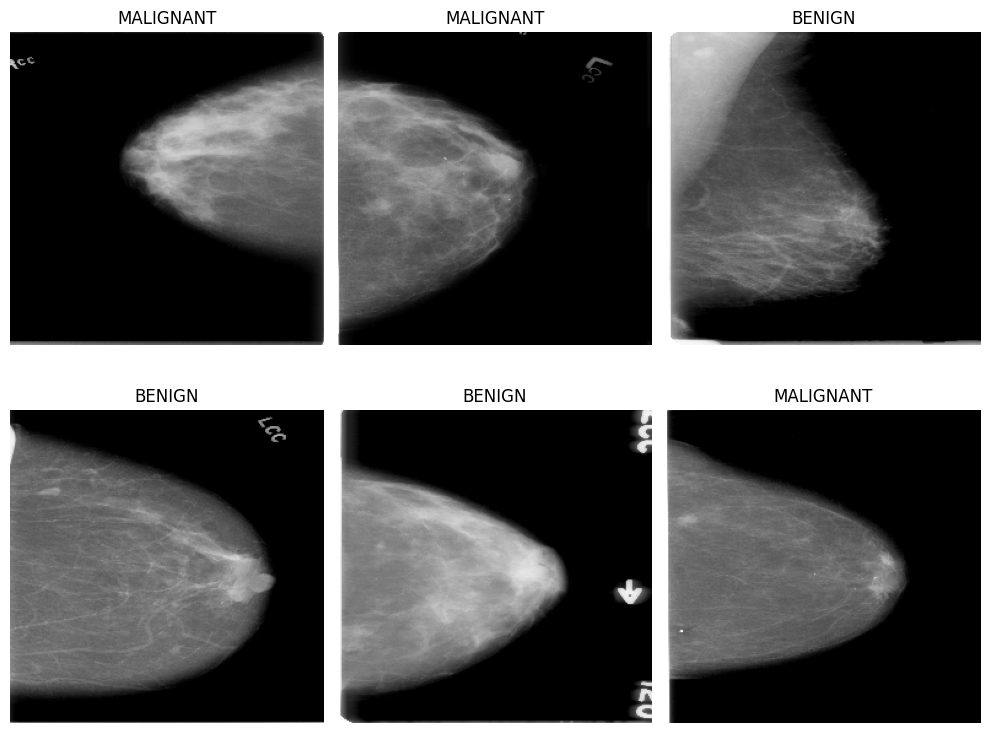

In [53]:
def display_images(images, titles, rows, cols, figsize=(10, 8)):
    """Display a grid of images with titles"""
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Select a sample
sample_images = X_train[:6]
sample_labels = y_train_labels[:6] # Convert one-hot to class index

# Titles
class_names = ['BENIGN', 'MALIGNANT', 'BENIGN_WITHOUT_CALLBACK']
image_titles = [class_names[label] for label in sample_labels]

# Display
display_images(sample_images, image_titles, 2, 3)


In [54]:
# Split labels for classification visualization
#labels = full_mass_sample['labels'].values
#y_train_labels, y_temp_labels = train_test_split(labels, test_size=0.2, random_state=42)
#y_test_labels, y_val_labels = train_test_split(y_temp_labels, test_size=0.2, random_state=42)


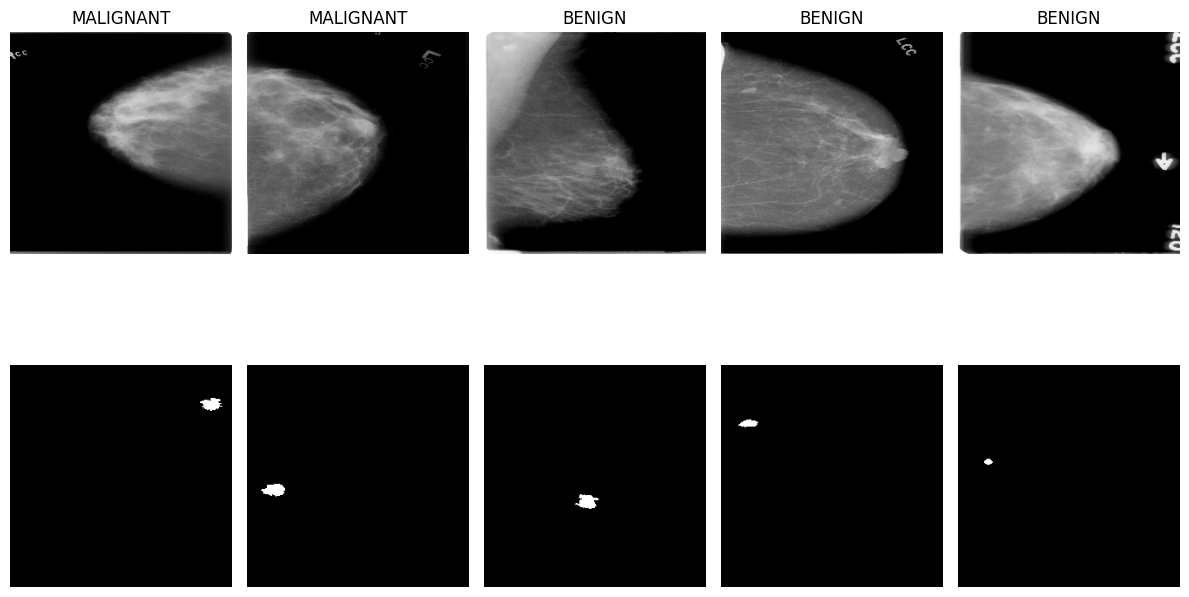

In [55]:
def display_images_and_masks(images, masks, titles=None, figsize=(12, 8)):
    """Display each image and its corresponding mask in two rows"""
    num_images = len(images)
    fig, axes = plt.subplots(2, num_images, figsize=figsize)

    for i in range(num_images):
        # Top row: Original images
        axes[0, i].imshow(images[i])
        if titles:
            axes[0, i].set_title(titles[i])
        axes[0, i].axis('off')
        
        # Bottom row: Masks
        axes[1, i].imshow(masks[i], cmap='gray')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()
    
# Select samples
num_samples = 5
sample_images = X_train[:num_samples]
sample_masks = y_train_masks[:num_samples]
sample_labels = y_train_labels[:num_samples]

# Titles
class_names = ['BENIGN', 'MALIGNANT', 'BENIGN_WITHOUT_CALLBACK']
#titles = [class_names[label] if isinstance(label,int) else label for label in sample_labels]
titles = [class_names[label] for label in sample_labels]

# Display
display_images_and_masks(sample_images, sample_masks, titles)

Model Development


In [211]:

# Building Unet by dividing encoder and decoder into blocks
# Importing the libraries
import tensorflow as tf

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(inputs, num_filters):
  x = tf.keras.Sequential([
      # Convolutional Layer
      tf.keras.layers.Conv2D(num_filters, 3, padding='same'),
      # Batch Normalization Layer
      tf.keras.layers.BatchNormalization(),
      # Activation Layer
      tf.keras.layers.Activation('relu'),
      # Convolutional Layer
      tf.keras.layers.Conv2D(num_filters, 3, padding='same'),
      # Batch Normalization Layer
      tf.keras.layers.BatchNormalization(),
      # Activation Layer
      tf.keras.layers.Activation('relu')
  ])(inputs)

    # Returning the output of the Convolutional Block
  return x

# Defining the Unet++ Model
def unet_plus_plus_model(input_shape=(256, 256, 3), num_classes=1, deep_supervision=True):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Encoding Path
    x_00 = conv_block(inputs, 64)
    x_10 = conv_block(tf.keras.layers.MaxPooling2D()(x_00), 128)
    x_20 = conv_block(tf.keras.layers.MaxPooling2D()(x_10), 256)
    x_30 = conv_block(tf.keras.layers.MaxPooling2D()(x_20), 512)
    x_40 = conv_block(tf.keras.layers.MaxPooling2D()(x_30), 1024)

    # Nested Decoding Path
    x_01 = conv_block(tf.keras.layers.concatenate(
        [x_00, tf.keras.layers.UpSampling2D()(x_10)]), 64)
    x_11 = conv_block(tf.keras.layers.concatenate(
        [x_10, tf.keras.layers.UpSampling2D()(x_20)]), 128)
    x_21 = conv_block(tf.keras.layers.concatenate(
        [x_20, tf.keras.layers.UpSampling2D()(x_30)]), 256)
    x_31 = conv_block(tf.keras.layers.concatenate(
        [x_30, tf.keras.layers.UpSampling2D()(x_40)]), 512)

    x_02 = conv_block(tf.keras.layers.concatenate(
        [x_00, x_01, tf.keras.layers.UpSampling2D()(x_11)]), 64)
    x_12 = conv_block(tf.keras.layers.concatenate(
        [x_10, x_11, tf.keras.layers.UpSampling2D()(x_21)]), 128)
    x_22 = conv_block(tf.keras.layers.concatenate(
        [x_20, x_21, tf.keras.layers.UpSampling2D()(x_31)]), 256)

    x_03 = conv_block(tf.keras.layers.concatenate(
        [x_00, x_01, x_02, tf.keras.layers.UpSampling2D()(x_12)]), 64)
    x_13 = conv_block(tf.keras.layers.concatenate(
        [x_10, x_11, x_12, tf.keras.layers.UpSampling2D()(x_22)]), 128)

    x_04 = conv_block(tf.keras.layers.concatenate(
        [x_00, x_01, x_02, x_03, tf.keras.layers.UpSampling2D()(x_13)]), 64)

    # Deep Supervision Path
    # If deep supervision is enabled, then the model will output the segmentation maps
    # at each stage of the decoding path
    if deep_supervision:
        outputs = [
            tf.keras.layers.Conv2D(num_classes, 1, padding='same')(x_01),
            tf.keras.layers.Conv2D(num_classes, 1, padding='same')(x_02),
            tf.keras.layers.Conv2D(num_classes, 1, padding='same')(x_03),
            tf.keras.layers.Conv2D(num_classes, 1, padding='same')(x_04)
        ]
        # Concatenating the segmentation maps
        outputs = tf.keras.layers.concatenate(outputs, axis=0)

    # If deep supervision is disabled, then the model will output the final segmentation map
    # which is the segmentation map at the end of the decoding path
    else:
        outputs = tf.keras.layers.Conv2D(num_classes, 1, padding='same')(x_04)

    # Creating the model
    model = tf.keras.Model(
        inputs=inputs, outputs=outputs, name='Unet_plus_plus')

    # Returning the model
    return model


In [212]:
IMG_HEIGHT = X_resized.shape[1]
IMG_WIDTH  = X_resized.shape[2]
IMG_CHANNELS = X_resized.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [213]:
model = unet_plus_plus_model(input_shape=(
        256, 256, 3), num_classes=1, deep_supervision=True)
# Printing the model summary
model.summary()

Model: "Unet_plus_plus"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_105 (Sequential  (None, 256, 256, 64)         39232     ['input_8[0][0]']             
 )                                                                                                
                                                                                                  
 max_pooling2d_28 (MaxPooli  (None, 128, 128, 64)         0         ['sequential_105[0][0]']      
 ng2D)                                                                                            
                                                                                     

Define UNet

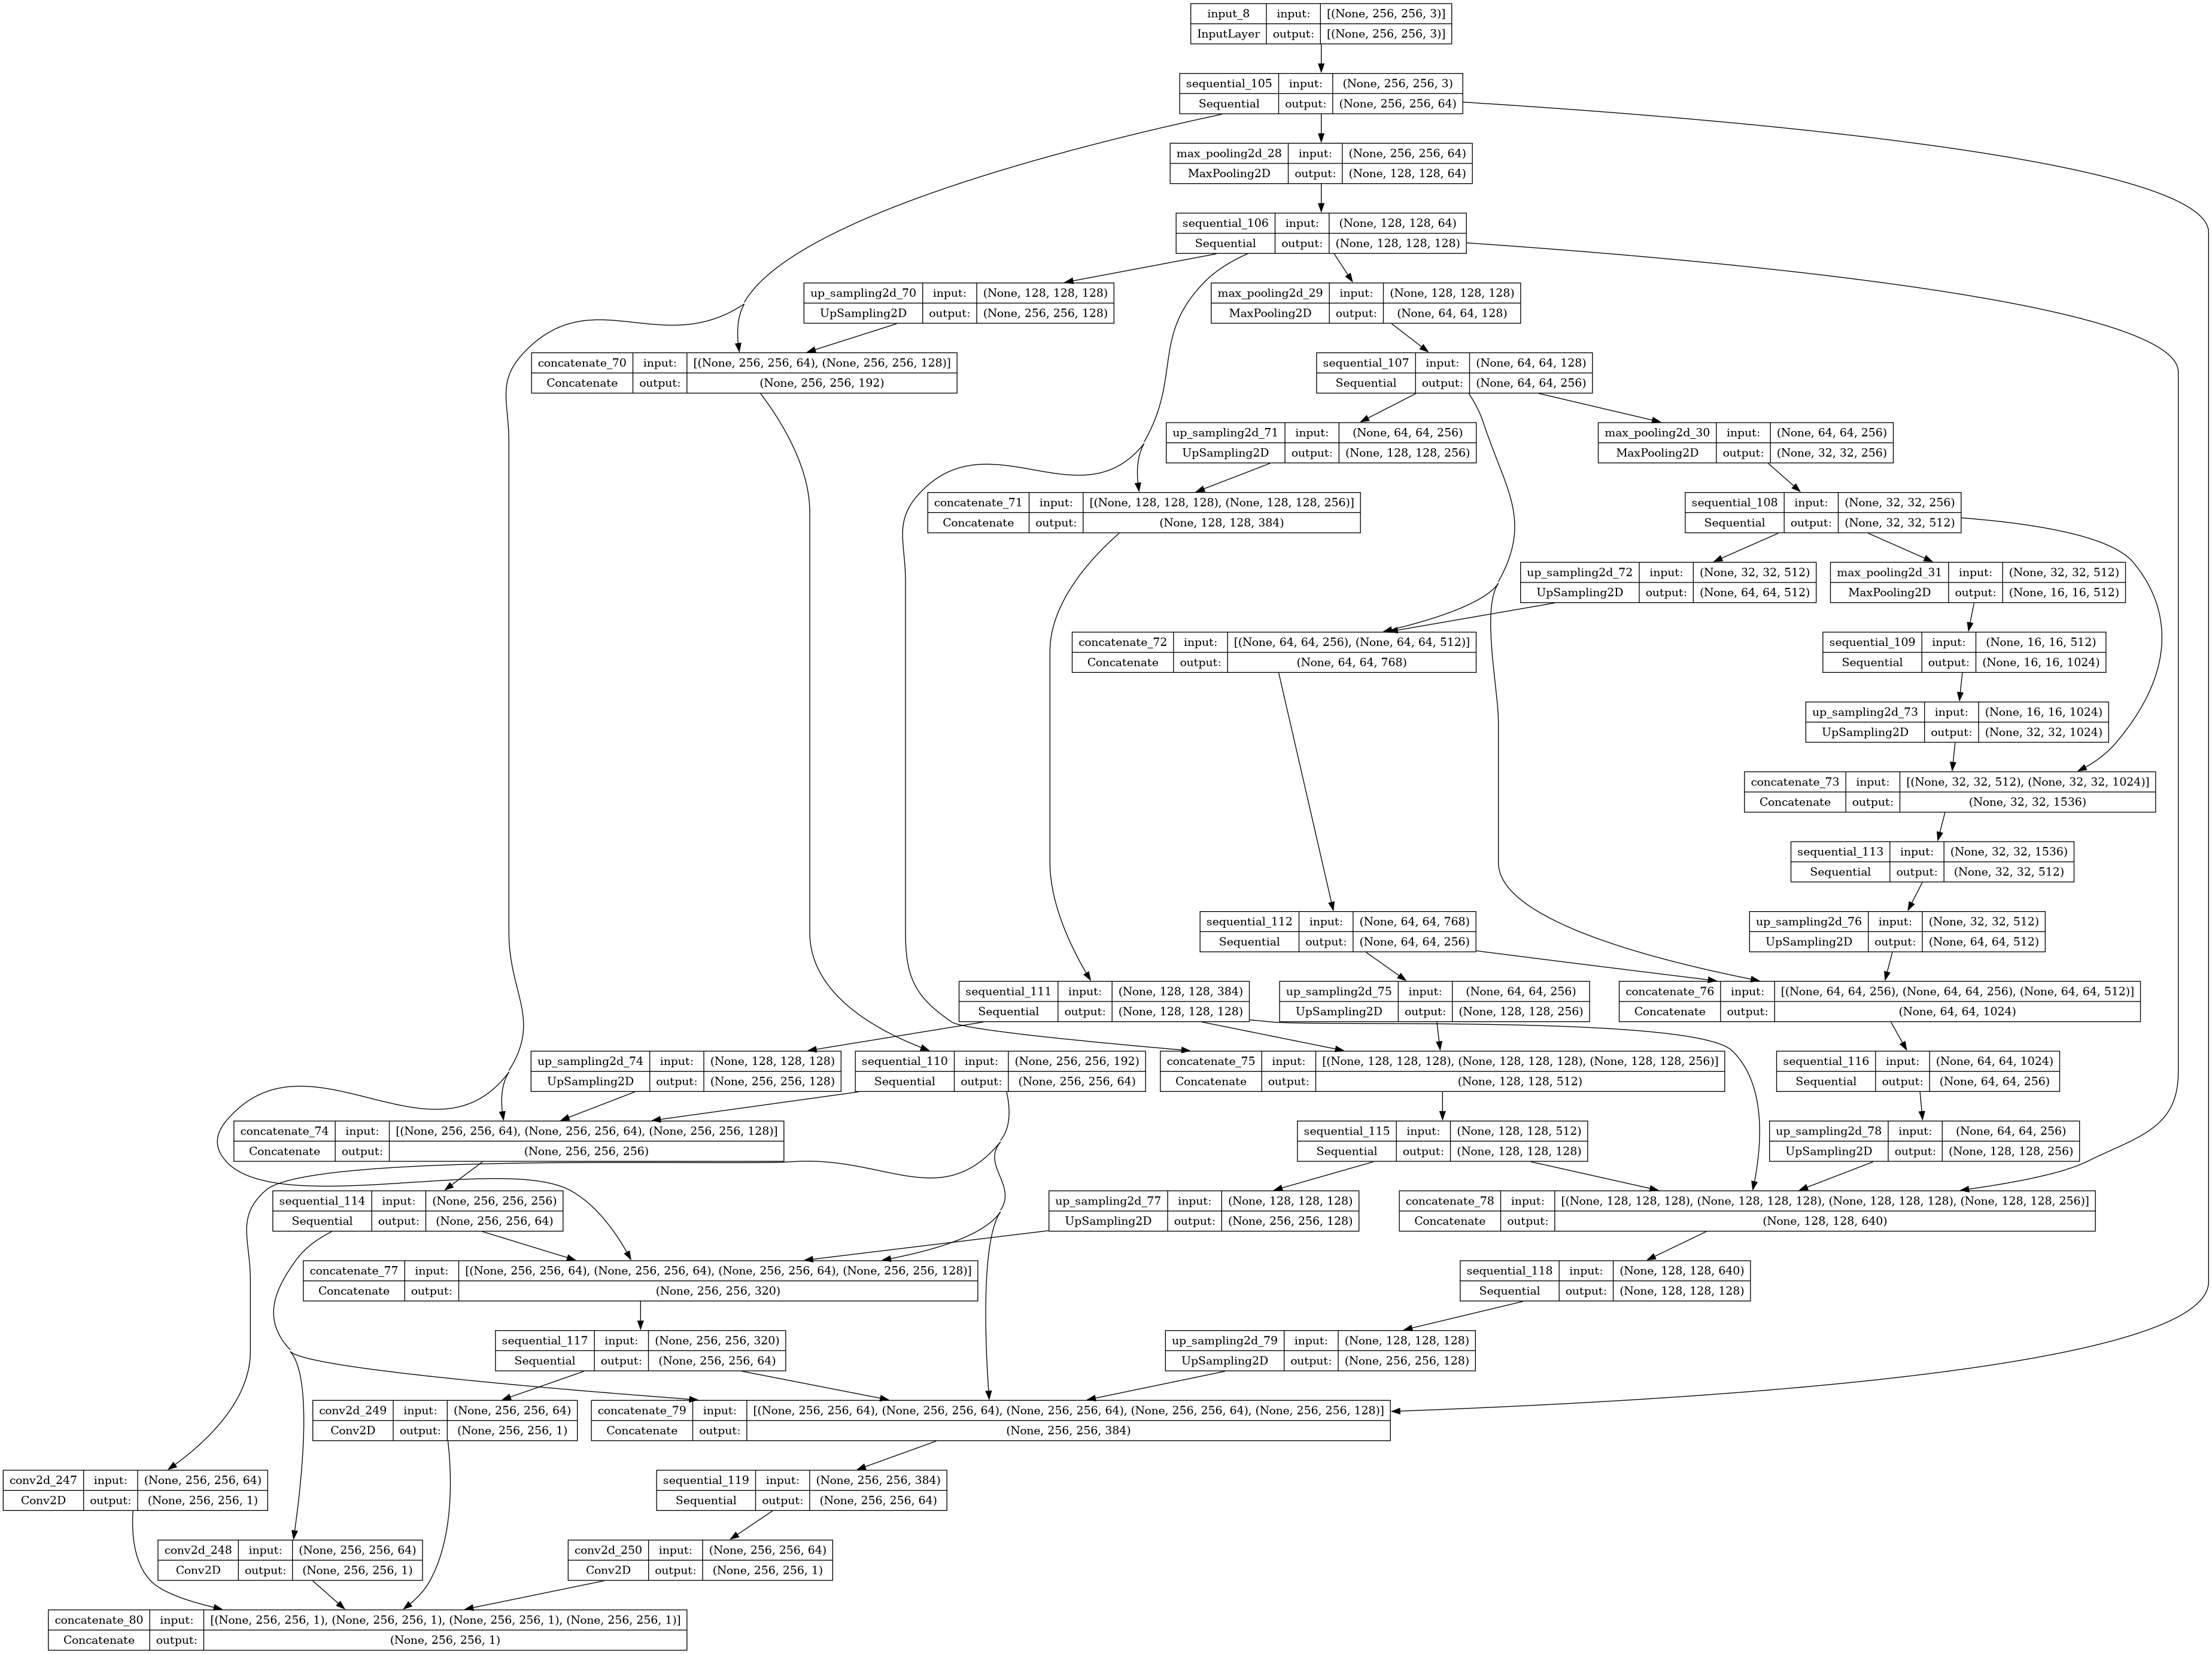

In [214]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [215]:
import tensorflow as tf
from tensorflow.keras import backend as K

"""@tf.keras.utils.register_keras_serializable()
def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(K.sigmoid(y_pred))  # Force into [0,1]
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) /
                (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

@tf.keras.utils.register_keras_serializable()
def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    return 0.3 * bce + 0.7 * d_loss  # Adjust weights if needed"""

@tf.keras.utils.register_keras_serializable()
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(K.round(y_pred))  # Binarize for metric
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [216]:
#Load previously saved model
from keras.models import load_model
model = load_model('UNet++.keras', 
                   #custom_objects={'bce_dice_loss': bce_dice_loss}, 
                   compile=False)
model_name = "UNet++"

In [223]:
# Compile the model before training
initial_learning_rate = 1e-4
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), 
              loss='binary_crossentropy',
              #loss=bce_dice_loss, 
              metrics=['accuracy', 
                       dice_coef
                        ])

In [224]:
# Define a learning rate scheduler (if needed)
def lr_schedule(epoch):
    # Learning Rate Schedule
    lr = initial_learning_rate
    if epoch > 10:
        lr *= 0.1
    elif epoch > 5:
        lr *= 0.5
    return lr

In [225]:
from keras.callbacks import ModelCheckpoint

# Define the checkpoint directory and file name
checkpoint_filepath = '/scratch/xxsi3290/Kaggle/Code/checkpoint_directory/model-{epoch:02d}-{val_accuracy:.2f}.weights.h5'

# Create a ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [226]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
   monitor='val_loss',  # Monitor validation loss
   patience=5,  
   min_delta=0,  
   mode='max', 
   verbose=1,  
   restore_best_weights=True
)

Model Training

In [227]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.13.0
Num GPUs Available: 0


In [229]:
foreground_ratio = np.sum(y_train_masks) / np.prod(y_train_masks.shape)
print("Foreground pixel ratio:", foreground_ratio)


Foreground pixel ratio: 0.004985534996300564


In [228]:
batch_size = 8
max_epochs = 100 
num_iterations = 50

history = model.fit(X_train, y_train_masks, 
                    batch_size = batch_size, 
                    epochs=max_epochs, 
                    #steps_per_epoch=num_iterations,
                    validation_data=(X_test, y_test_masks), 
                    callbacks=[LearningRateScheduler(lr_schedule), early_stopping, model_checkpoint_callback],
                    shuffle=False)

Epoch 1/100
111/111 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9942 - dice_coef: 4.3137e-04
Epoch 1: val_accuracy improved from -inf to 0.99467, saving model to /scratch/xxsi3290/Kaggle/Code/checkpoint_directory/model-01-0.99.weights.h5
111/111 [==============================] - 256s 2s/step - loss: 0.0449 - accuracy: 0.9942 - dice_coef: 4.3137e-04 - val_loss: 0.0638 - val_accuracy: 0.9947 - val_dice_coef: 0.0027 - lr: 1.0000e-04
Epoch 2/100
111/111 [==============================] - ETA: 0s - loss: 0.0314 - accuracy: 0.9948 - dice_coef: 0.0018
Epoch 2: val_accuracy improved from 0.99467 to 0.99472, saving model to /scratch/xxsi3290/Kaggle/Code/checkpoint_directory/model-02-0.99.weights.h5
111/111 [==============================] - 250s 2s/step - loss: 0.0314 - accuracy: 0.9948 - dice_coef: 0.0018 - val_loss: 0.0378 - val_accuracy: 0.9947 - val_dice_coef: 0.0014 - lr: 1.0000e-04
Epoch 3/100
111/111 [==============================] - ETA: 0s - loss: 0.0356 -

KeyboardInterrupt: 

In [ ]:
#Save the model for future use
model.save('UNet++.keras')


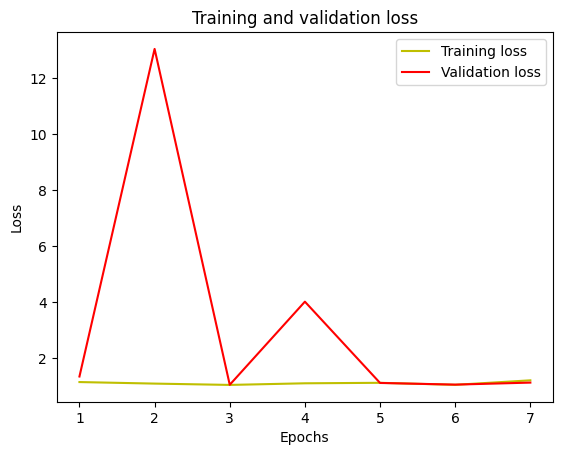

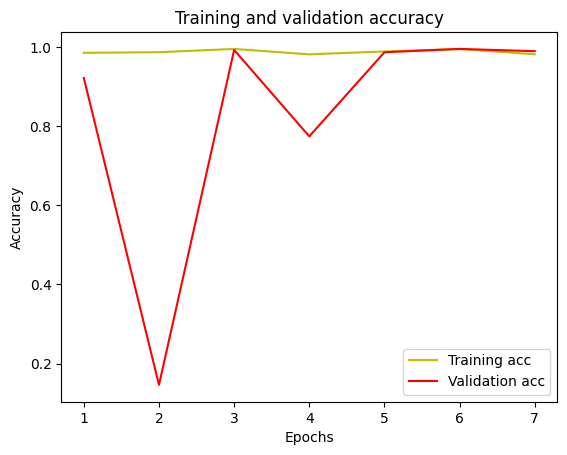

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation Dice Coefficient
dice = history.history['dice_coef']
val_dice = history.history['val_dice_coef']
plt.plot(epochs, dice, 'y', label='Training Dice Coefficient')
plt.plot(epochs, val_dice, 'r', label='Validation Dice Coefficient')
plt.title('Training and Validation Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model('UNet++.keras', custom_objects={'bce_dice_loss': bce_dice_loss}, compile=False)
model_name = "UNet++"
        

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 16s 2s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test_masks)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.07389788


In [ ]:
# Calculate overall training and validation loss and accuracy
overall_train_loss = np.mean(loss)
overall_train_accuracy = np.mean(acc)
overall_val_loss = np.mean(val_loss)
overall_val_accuracy = np.mean(val_acc)
overall_train_dice = np.mean(dice)
overall_val_dice = np.mean(val_dice)

# Print the overall accuracy
print("Overall Training Loss:", overall_train_loss)
print("Overall Validation Loss:", overall_val_loss)
print("Overall Training Accuracy:", overall_train_accuracy)
print("Overall Validation Accuracy:", overall_val_accuracy)
print("Train Dice Coefficient:", overall_train_dice)
print("Validation Dice Coefficient:", overall_val_dice)

Overall Training Loss: 1.1102987698146276
Overall Validation Loss: 3.251141973904201
Overall Training Accuracy: 0.9873088853699821
Overall Validation Accuracy: 0.8291434815951756


(1, 256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256)


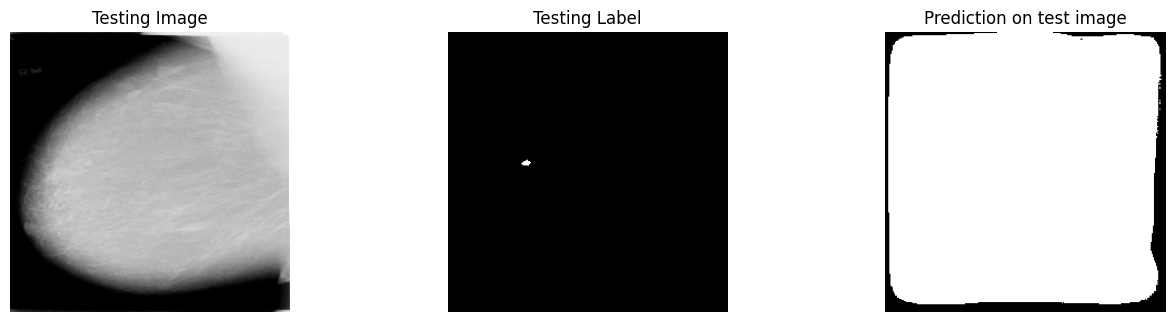

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test_masks[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))

plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.axis('off')

plt.subplot(232)
plt.axis('off')
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.axis('off')

plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.axis('off')

plt.show()

Save all the results in file

In [ ]:
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as img 

def save_evaluation_results(history, y_test_masks, y_pred_thresholded, output_directory):
    # Calculate mean IoU
    n_classes = 2
    IOU_keras = MeanIoU(num_classes=n_classes)
    IOU_keras.update_state(y_pred_thresholded, y_test_masks)
    mean_iou = IOU_keras.result().numpy()

    # Extract training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    dice = history.history['dice']
    val_dice = history.history['val_dice']

    # Calculate averages
    overall_train_loss = np.mean(loss)
    overall_val_loss = np.mean(val_loss)
    overall_train_accuracy = np.mean(acc)
    overall_val_accuracy = np.mean(val_acc)
    overall_train_dice = np.mean(dice)
    overall_val_dice = np.mean(val_dice)

    # Create results summary text
    results_text = f"""
Model Evaluation Results
------------------------
Mean IoU: {mean_iou:.4f}

Overall Training Loss: {overall_train_loss:.4f}
Overall Validation Loss: {overall_val_loss:.4f}
Overall Training Accuracy: {overall_train_accuracy:.4f}
Overall Validation Accuracy: {overall_val_accuracy:.4f}
Overall Train Dice Coefficient: {overall_train_dice: .4f}
Overall Validation Dice Coefficient: {overall_val_dice: .4f}
"""

    # Save results to file in the same directory as predictions
    results_file_path = os.path.join(output_directory, "model_evaluation_results.txt")
    with open(results_file_path, "w") as f:
        f.write(results_text)

    print(f"Saved evaluation results to {results_file_path}")

# Function to save individual test image prediction results
def save_predictions(test_img, ground_truth, prediction, output_directory, sample_id):
    plt.figure(figsize=(16, 8))

    # Original Test Image
    plt.subplot(1, 3, 1)
    plt.title('Testing Image')
    plt.imshow(test_img[:, :, 0], cmap='gray')
    plt.axis('off')

    # Ground Truth Mask
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth')
    plt.imshow(ground_truth[:, :, 0], cmap='gray')
    plt.axis('off')

    # Model Prediction
    plt.subplot(1, 3, 3)
    plt.title('Prediction')
    plt.imshow(prediction, cmap='gray')
    plt.axis('off')

    filename = os.path.join(output_directory, f"prediction_sample_{sample_id}.png")
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print(f"Saved prediction result to {filename}")

def save_loss_accuracy_plots(history, output_directory, model, model_name):
    """Function to save loss and accuracy plots during training."""
    # Extract loss and accuracy data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    dice = history.history['dice_coef']
    val_dice = history.history['val_dice_coef']
    
    # Define the epochs
    epochs = range(1, len(loss) + 1)

    # Save training and validation loss plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    loss_plot_path = os.path.join(output_directory, "loss_plot.png")
    plt.savefig(loss_plot_path)
    plt.close()
    print(f"Saved loss plot to {loss_plot_path}")

    # Save training and validation accuracy plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, acc, 'y', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    acc_plot_path = os.path.join(output_directory, "accuracy_plot.png")
    plt.savefig(acc_plot_path)
    plt.close()
    print(f"Saved accuracy plot to {acc_plot_path}")
    
    # Plot the training and validation Dice Coefficient
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, dice, 'y', label='Training Dice Coefficient')
    plt.plot(epochs, val_dice, 'r', label='Validation Dice Coefficient')
    plt.title('Training and Validation Dice Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('Dice Coefficient')
    plt.legend()
    plt.show()
    dice_plot_path = os.path.join(output_directory, "dice_coeff_plot.png")
    plt.savefig(dice_plot_path)
    plt.close()
    print(f"Saved accuracy plot to {dice_plot_path}")
    
    # Save model architecture image
    filename = f"{model_name}_architecture.png"
    tf.keras.utils.plot_model(model, to_file=filename, show_shapes=True)

    # Reload and display image with model name on top
    img = mpimg.imread(filename)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.title(model_name, fontsize=18)
    plt.savefig(f"{model_name}_annotated.png", bbox_inches='tight')
    model = os.path.join(output_directory, f"{model_name}_architecture.png")
    plt.savefig(model)
    plt.close()
    print(f"Saved accuracy plot to {model}")

def show_predictions(X_test, y_test_masks, model, history, num=1):
    """Function to process test images, save results and plot training history"""
    # Define the output directory for saving images and plots
    parent_dir = os.path.abspath("/scratch/xxsi3290/Kaggle/Segmentation_results")
    file_time = time.strftime('%Y%m%d_%H%M%S')
    output_directory = os.path.join(parent_dir, f"{file_time}_new_UNET_Segmentation")

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        print(f"Created directory: {output_directory}")
    else:
        print(f"Saving to existing directory: {output_directory}")

    # Step 1: Save the loss and accuracy plots
    save_loss_accuracy_plots(history, output_directory, model, model_name)
    
    # Step 2: Save mIoU, accuracy, and loss in txt file
    save_evaluation_results(history, y_test_masks, y_pred_thresholded, output_directory)

    # Step 3: Save predictions
    sample_id = 0
    for _ in range(num):
        test_img_number = random.randint(0, len(X_test) - 1)  # Random image number
        test_img = X_test[test_img_number]
        ground_truth = y_test_masks[test_img_number]

        test_img_input = np.expand_dims(test_img, 0)  # Add batch dimension
        prediction = (model.predict(test_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)  # Apply threshold

        # Save the results for this test image
        save_predictions(test_img, ground_truth, prediction, output_directory, sample_id)
        sample_id += 1

# Example usage
# Assuming X_test and y_test_masks are already loaded and the model is compiled
show_predictions(X_test, y_test_masks, model, history, num=30)  # Adjust 'num' for more or fewer samples


Created directory: /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation
Saved loss plot to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/loss_plot.png
Saved accuracy plot to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/accuracy_plot.png
Saved accuracy plot to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/UNet++_architecture.png
Saved evaluation results to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/model_evaluation_results.txt
1/1 [==============================] - 0s 113ms/step
Saved prediction result to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/prediction_sample_0.png
1/1 [==============================] - 0s 119ms/step
Saved prediction result to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/prediction_sample_1.png
1/1 [==